<a href="https://colab.research.google.com/github/Manggy94/PokerBrain/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and settings
**Introduction et réglages**

First, We have to mount drive and verify its content, to add it to our path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here is the content of our folder, raw Data is in history file

In [2]:
!ls "/content/drive/MyDrive/PokerBrain/PokerBrain"

API	      DBManager       history		   main.py	    tests
brain.py      file_reader.py  history2		   Models	    tf_tuto.py
Brains	      Game	      historyexample2.txt  predictor.py     tracker.py
converter.py  Guesser	      historyexample.txt   preprocessor.py
Data	      Histories       logs		   __pycache__


Then we can import necessary libraries and modules



In [3]:
!pip install treys
import treys
import sys
import os
sys.path.append('/content/drive/MyDrive/PokerBrain/PokerBrain')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from preprocessor import *
from tracker import *
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

In [4]:
if os.getcwd() != "/content/drive/MyDrive/PokerBrain/PokerBrain":
  os.chdir(f"{os.getcwd()}/drive/MyDrive/PokerBrain/PokerBrain")


In [5]:
pd.set_option("display.max_row", 210)
pd.set_option("display.max_column", 210)

---

#Data Loading
**Chargement des données**

##Downloading the dataset

Téléchargement du jeu de données

In [6]:
data = pd.read_csv(f"{os.getcwd()}/Data/combo_data_tab.csv", index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (74,98,104,194) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Preliminary observations

Observations préliminaires

First, we check the different features present in the dataset and its shape



In [7]:
data.head()

,hand,hand_id,tour_id,table_id,level,current_street,bb,ante,max_pl,buyin,hero_combo,hero_hand,hero_first_suit,hero_second_suit,hero_first_rank,hero_second_rank,hero_position,UTG_name,UTG_stack,UTG_stack_bb,UTG_combo,UTG_hand,UTG_PF_action_0_move,UTG_PF_action_0_val,UTG_PF_action_0_val_bb,UTG_PF_action_1_move,UTG_PF_action_1_val,UTG_PF_action_1_val_bb,UTG_F_action_0_move,UTG_F_action_0_val,UTG_F_action_0_val_bb,UTG_F_action_1_move,UTG_F_action_1_val,UTG_F_action_1_val_bb,UTG_T_action_0_move,UTG_T_action_0_val,UTG_T_action_0_val_bb,UTG_T_action_1_move,UTG_T_action_1_val,UTG_T_action_1_val_bb,UTG_R_action_0_move,UTG_R_action_0_val,UTG_R_action_0_val_bb,UTG_R_action_1_move,UTG_R_action_1_val,UTG_R_action_1_val_bb,UTG_act_0_ratio,UTG1_name,UTG1_stack,UTG1_stack_bb,UTG1_combo,UTG1_hand,UTG1_PF_action_0_move,UTG1_PF_action_0_val,UTG1_PF_action_0_val_bb,UTG1_PF_action_1_move,UTG1_PF_action_1_val,UTG1_PF_action_1_val_bb,UTG1_F_action_0_move,UTG1_F_action_0_val,UTG1_F_action_0_val_bb,UTG1_F_action_1_move,UTG1_F_action_1_val,UTG1_F_action_1_val_bb,UTG1_T_action_0_move,UTG1_T_action_0_val,UTG1_T_action_0_val_bb,UTG1_T_action_1_move,UTG1_T_action_1_val,UTG1_T_action_1_val_bb,UTG1_R_action_0_move,UTG1_R_action_0_val,UTG1_R_action_0_val_bb,UTG1_R_action_1_move,UTG1_R_action_1_val,UTG1_R_action_1_val_bb,UTG1_act_0_ratio,UTG2_name,UTG2_stack,UTG2_stack_bb,UTG2_combo,UTG2_hand,UTG2_PF_action_0_move,UTG2_PF_action_0_val,UTG2_PF_action_0_val_bb,UTG2_PF_action_1_move,UTG2_PF_action_1_val,UTG2_PF_action_1_val_bb,UTG2_F_action_0_move,UTG2_F_action_0_val,UTG2_F_action_0_val_bb,UTG2_F_action_1_move,UTG2_F_action_1_val,UTG2_F_action_1_val_bb,UTG2_T_action_0_move,UTG2_T_action_0_val,UTG2_T_action_0_val_bb,UTG2_T_action_1_move,UTG2_T_action_1_val,UTG2_T_action_1_val_bb,UTG2_R_action_0_move,UTG2_R_action_0_val,UTG2_R_action_0_val_bb,UTG2_R_action_1_move,UTG2_R_action_1_val,...,BTN_PF_action_0_val_bb,BTN_PF_action_1_move,BTN_PF_action_1_val,BTN_PF_action_1_val_bb,BTN_F_action_0_move,BTN_F_action_0_val,BTN_F_action_0_val_bb,BTN_F_action_1_move,BTN_F_action_1_val,BTN_F_action_1_val_bb,BTN_T_action_0_move,BTN_T_action_0_val,BTN_T_action_0_val_bb,BTN_T_action_1_move,BTN_T_action_1_val,BTN_T_action_1_val_bb,BTN_R_action_0_move,BTN_R_action_0_val,BTN_R_action_0_val_bb,BTN_R_action_1_move,BTN_R_action_1_val,BTN_R_action_1_val_bb,BTN_act_0_ratio,SB_name,SB_stack,SB_stack_bb,SB_combo,SB_hand,SB_PF_action_0_move,SB_PF_action_0_val,SB_PF_action_0_val_bb,SB_PF_action_1_move,SB_PF_action_1_val,SB_PF_action_1_val_bb,SB_F_action_0_move,SB_F_action_0_val,SB_F_action_0_val_bb,SB_F_action_1_move,SB_F_action_1_val,SB_F_action_1_val_bb,SB_T_action_0_move,SB_T_action_0_val,SB_T_action_0_val_bb,SB_T_action_1_move,SB_T_action_1_val,SB_T_action_1_val_bb,SB_R_action_0_move,SB_R_action_0_val,SB_R_action_0_val_bb,SB_R_action_1_move,SB_R_action_1_val,SB_R_action_1_val_bb,SB_act_0_ratio,BB_name,BB_stack,BB_stack_bb,BB_combo,BB_hand,BB_PF_action_0_move,BB_PF_action_0_val,BB_PF_action_0_val_bb,BB_PF_action_1_move,BB_PF_action_1_val,BB_PF_action_1_val_bb,BB_F_action_0_move,BB_F_action_0_val,BB_F_action_0_val_bb,BB_F_action_1_move,BB_F_action_1_val,BB_F_action_1_val_bb,BB_T_action_0_move,BB_T_action_0_val,BB_T_action_0_val_bb,BB_T_action_1_move,BB_T_action_1_val,BB_T_action_1_val_bb,BB_R_action_0_move,BB_R_action_0_val,BB_R_action_0_val_bb,BB_R_action_1_move,BB_R_action_1_val,BB_R_action_1_val_bb,BB_act_0_ratio,Card_0,Card_0_rank,Card_0_suit,Card_1,Card_1_rank,Card_1_suit,Card_2,Card_2_rank,Card_2_suit,Card_3,Card_3_rank,Card_3_suit,Card_4,Card_4_rank,Card_4_suit,is_rainbow,is_triplet,is_monotone,has_pair,has_straightdraw,has_gutshot,has_flushdraw
0,Hand_id: 563848907256234013-1-1443880804\n\nTo...,563848907256234013-1-1443880804,131281304,28,6,SD,400.0,30.0,9,5.0,9c6s,96o,c,s,9,6,CO,Remundo63,10000.0,25.000,AhJs,AJo,RAISE,400.0,1.0,CALL,9170.0,22.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,Mathiiilde83,10000.0,25.000,AsTd,ATo,RAISE,2470.0,6.175,CALL,6

This  dataset takes into account all positions for one single hand history. In previous observations, we had observed that positions UTG2 and UTG3 are very empty very often (since we play 6-max or 8-max poker 99% of the time). What is more, each street is often limited to 2 actions by plyer. Thus, it has been chosen to watch only 2 actions by position for each street and to eliminate positions UTG2 and UTG3 from observations for the moment.

In [8]:
data.shape

(72656, 279)

In [9]:
print(f"As of {datetime.date.today()}, the dataset contains {data.shape[0]} data points, and {data.shape[1]} features")

As of 2022-03-06, the dataset contains 72656 data points, and 279 features


This dataset might be a preliminary one, thus we cannot directly indicate the target column, but it will be hand_columns, or combo columns for each player that has shown one on hands that went to showdown (or for hero if we want a better understanding of strategy one hands that folded)

Now we can check the data type of each column

In [10]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72656 entries, 0 to 72655
Data columns (total 279 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    hand                     72656 non-null  object 
 1    hand_id                  72656 non-null  object 
 2    tour_id                  72656 non-null  int64  
 3    table_id                 72656 non-null  int64  
 4    level                    72656 non-null  int64  
 5    current_street           72656 non-null  object 
 6    bb                       72656 non-null  float64
 7    ante                     72656 non-null  float64
 8    max_pl                   72656 non-null  int64  
 9    buyin                    72656 non-null  float64
 10   hero_combo               72656 non-null  object 
 11   hero_hand                72487 non-null  object 
 12   hero_first_suit          72656 non-null  object 
 13   hero_second_suit         72656 non-null  object 
 14   hero

In [11]:
pd.DataFrame(data.isnull().sum()).T

,hand,hand_id,tour_id,table_id,level,current_street,bb,ante,max_pl,buyin,hero_combo,hero_hand,hero_first_suit,hero_second_suit,hero_first_rank,hero_second_rank,hero_position,UTG_name,UTG_stack,UTG_stack_bb,UTG_combo,UTG_hand,UTG_PF_action_0_move,UTG_PF_action_0_val,UTG_PF_action_0_val_bb,UTG_PF_action_1_move,UTG_PF_action_1_val,UTG_PF_action_1_val_bb,UTG_F_action_0_move,UTG_F_action_0_val,UTG_F_action_0_val_bb,UTG_F_action_1_move,UTG_F_action_1_val,UTG_F_action_1_val_bb,UTG_T_action_0_move,UTG_T_action_0_val,UTG_T_action_0_val_bb,UTG_T_action_1_move,UTG_T_action_1_val,UTG_T_action_1_val_bb,UTG_R_action_0_move,UTG_R_action_0_val,UTG_R_action_0_val_bb,UTG_R_action_1_move,UTG_R_action_1_val,UTG_R_action_1_val_bb,UTG_act_0_ratio,UTG1_name,UTG1_stack,UTG1_stack_bb,UTG1_combo,UTG1_hand,UTG1_PF_action_0_move,UTG1_PF_action_0_val,UTG1_PF_action_0_val_bb,UTG1_PF_action_1_move,UTG1_PF_action_1_val,UTG1_PF_action_1_val_bb,UTG1_F_action_0_move,UTG1_F_action_0_val,UTG1_F_action_0_val_bb,UTG1_F_action_1_move,UTG1_F_action_1_val,UTG1_F_action_1_val_bb,UTG1_T_action_0_move,UTG1_T_action_0_val,UTG1_T_action_0_val_bb,UTG1_T_action_1_move,UTG1_T_action_1_val,UTG1_T_action_1_val_bb,UTG1_R_action_0_move,UTG1_R_action_0_val,UTG1_R_action_0_val_bb,UTG1_R_action_1_move,UTG1_R_action_1_val,UTG1_R_action_1_val_bb,UTG1_act_0_ratio,UTG2_name,UTG2_stack,UTG2_stack_bb,UTG2_combo,UTG2_hand,UTG2_PF_action_0_move,UTG2_PF_action_0_val,UTG2_PF_action_0_val_bb,UTG2_PF_action_1_move,UTG2_PF_action_1_val,UTG2_PF_action_1_val_bb,UTG2_F_action_0_move,UTG2_F_action_0_val,UTG2_F_action_0_val_bb,UTG2_F_action_1_move,UTG2_F_action_1_val,UTG2_F_action_1_val_bb,UTG2_T_action_0_move,UTG2_T_action_0_val,UTG2_T_action_0_val_bb,UTG2_T_action_1_move,UTG2_T_action_1_val,UTG2_T_action_1_val_bb,UTG2_R_action_0_move,UTG2_R_action_0_val,UTG2_R_action_0_val_bb,UTG2_R_action_1_move,UTG2_R_action_1_val,...,BTN_PF_action_0_val_bb,BTN_PF_action_1_move,BTN_PF_action_1_val,BTN_PF_action_1_val_bb,BTN_F_action_0_move,BTN_F_action_0_val,BTN_F_action_0_val_bb,BTN_F_action_1_move,BTN_F_action_1_val,BTN_F_action_1_val_bb,BTN_T_action_0_move,BTN_T_action_0_val,BTN_T_action_0_val_bb,BTN_T_action_1_move,BTN_T_action_1_val,BTN_T_action_1_val_bb,BTN_R_action_0_move,BTN_R_action_0_val,BTN_R_action_0_val_bb,BTN_R_action_1_move,BTN_R_action_1_val,BTN_R_action_1_val_bb,BTN_act_0_ratio,SB_name,SB_stack,SB_stack_bb,SB_combo,SB_hand,SB_PF_action_0_move,SB_PF_action_0_val,SB_PF_action_0_val_bb,SB_PF_action_1_move,SB_PF_action_1_val,SB_PF_action_1_val_bb,SB_F_action_0_move,SB_F_action_0_val,SB_F_action_0_val_bb,SB_F_action_1_move,SB_F_action_1_val,SB_F_action_1_val_bb,SB_T_action_0_move,SB_T_action_0_val,SB_T_action_0_val_bb,SB_T_action_1_move,SB_T_action_1_val,SB_T_action_1_val_bb,SB_R_action_0_move,SB_R_action_0_val,SB_R_action_0_val_bb,SB_R_action_1_move,SB_R_action_1_val,SB_R_action_1_val_bb,SB_act_0_ratio,BB_name,BB_stack,BB_stack_bb,BB_combo,BB_hand,BB_PF_action_0_move,BB_PF_action_0_val,BB_PF_action_0_val_bb,BB_PF_action_1_move,BB_PF_action_1_val,BB_PF_action_1_val_bb,BB_F_action_0_move,BB_F_action_0_val,BB_F_action_0_val_bb,BB_F_action_1_move,BB_F_action_1_val,BB_F_action_1_val_bb,BB_T_action_0_move,BB_T_action_0_val,BB_T_action_0_val_bb,BB_T_action_1_move,BB_T_action_1_val,BB_T_action_1_val_bb,BB_R_action_0_move,BB_R_action_0_val,BB_R_action_0_val_bb,BB_R_action_1_move,BB_R_action_1_val,BB_R_action_1_val_bb,BB_act_0_ratio,Card_0,Card_0_rank,Card_0_suit,Card_1,Card_1_rank,Card_1_suit,Card_2,Card_2_rank,Card_2_suit,Card_3,Card_3_rank,Card_3_suit,Card_4,Card_4_rank,Card_4_suit,is_rainbow,is_triplet,is_monotone,has_pair,has_straightdraw,has_gutshot,has_flushdraw
0,0,0,0,0,0,0,0,0,0,0,0,169,0,0,0,0,169,12687,12687,12687,12687,44802,15122,15122,15122,66257,66257,66257,63045,63045,63045,69950,69950,69950,67298,67298,67298,71497,71497,71497,69281,69281,69281,72100,72100,72100,15122,51003,51003,51003,51003,63527,51983,51983,51983,70387,70387,70387,69467,69467,69467,71832,71832,71832,70984,70984,70984,72319,7

We can see that some columns have a lot of null values. This is because of the structure of a poker table where seats are not always all taken, and also because of the sequential structure of a poker round: Not all steps will happen every time. For example, if A raise is done PreFlop, a lot of players will fold, and they will not make any action at future streets

---

#First observations and visualizations
*Premières observations et visualisations*

##Creation of the first column subgroups

Création des premiers sous-groupes de colonnes



In [12]:
def preflop_condition(col):
  return "PF" in col or "hero" in col or "stack" in col or "name" in col or "ratio" in col

def flop_condition(col):
  return "_F_" in col or "is_" in col or "has_" in col or col in [f"Card_{i}{j}" for i in range(3) for j in ["","_rank", "_suit"]]

def turn_condition(col):
  return "_T_" in col or "Card_3" in col

def river_condition(col):
  return "_R_" in col or "Card_4" in col

def general_condition(col):
  return col in ["level", "bb", "ante", "hand_id", "tour_id", "table_id", "current_street", "max_pl", "buyin"]

def showdown_condition(col):
  return "_hand" in col or "combo" in col

In [13]:
G_info, PF_info, F_info, T_info, R_info, SD_info = [], [], [], [], [], []
for col in data.columns:
  if preflop_condition(col):
    PF_info.append(col)
  elif flop_condition(col):
    F_info.append(col)
  elif turn_condition(col):
    T_info.append(col)
  elif river_condition(col):
    R_info.append(col)
  elif general_condition(col):
    G_info.append(col)
  elif showdown_condition(col):
    SD_info.append(col)
del(col)


In [14]:
droppable_values = [x for x in data.columns if ((("val" in x  or "stack" in x) and ("bb" not in x and "ratio" not in x)))]
other_values = ["tour_id", "table_id"]
to_drop = droppable_values+other_values
del(droppable_values, other_values)

In [15]:
cat_data = data.select_dtypes(include="object").drop(["hand", "hand_id"], axis=1).where(data!="None")
num_data= data.select_dtypes(include=np.number).drop(to_drop, axis=1)
del(to_drop)

##Observation of subgroups by data type

Observation ses sous-groupes par data type

###Numerical data

In [16]:
num_data.describe()

,level,bb,ante,max_pl,buyin,UTG_stack_bb,UTG_PF_action_0_val_bb,UTG_PF_action_1_val_bb,UTG_F_action_0_val_bb,UTG_F_action_1_val_bb,UTG_T_action_0_val_bb,UTG_T_action_1_val_bb,UTG_R_action_0_val_bb,UTG_R_action_1_val_bb,UTG_act_0_ratio,UTG1_stack_bb,UTG1_PF_action_0_val_bb,UTG1_PF_action_1_val_bb,UTG1_F_action_0_val_bb,UTG1_F_action_1_val_bb,UTG1_T_action_0_val_bb,UTG1_T_action_1_val_bb,UTG1_R_action_0_val_bb,UTG1_R_action_1_val_bb,UTG1_act_0_ratio,UTG2_stack_bb,UTG2_PF_action_0_val_bb,UTG2_PF_action_1_val_bb,UTG2_F_action_0_val_bb,UTG2_F_action_1_val_bb,UTG2_T_action_0_val_bb,UTG2_T_action_1_val_bb,UTG2_R_action_0_val_bb,UTG2_R_action_1_val_bb,UTG2_act_0_ratio,HJ_stack_bb,HJ_PF_action_0_val_bb,HJ_PF_action_1_val_bb,HJ_F_action_0_val_bb,HJ_F_action_1_val_bb,HJ_T_action_0_val_bb,HJ_T_action_1_val_bb,HJ_R_action_0_val_bb,HJ_R_action_1_val_bb,HJ_act_0_ratio,CO_stack_bb,CO_PF_action_0_val_bb,CO_PF_action_1_val_bb,CO_F_action_0_val_bb,CO_F_action_1_val_bb,CO_T_action_0_val_bb,CO_T_action_1_val_bb,CO_R_action_0_val_bb,CO_R_action_1_val_bb,CO_act_0_ratio,BTN_stack_bb,BTN_PF_action_0_val_bb,BTN_PF_action_1_val_bb,BTN_F_action_0_val_bb,BTN_F_action_1_val_bb,BTN_T_action_0_val_bb,BTN_T_action_1_val_bb,BTN_R_action_0_val_bb,BTN_R_action_1_val_bb,BTN_act_0_ratio,SB_stack_bb,SB_PF_action_0_val_bb,SB_PF_action_1_val_bb,SB_F_action_0_val_bb,SB_F_action_1_val_bb,SB_T_action_0_val_bb,SB_T_action_1_val_bb,SB_R_action_0_val_bb,SB_R_action_1_val_bb,SB_act_0_ratio,BB_stack_bb,BB_PF_action_0_val_bb,BB_PF_action_1_val_bb,BB_F_action_0_val_bb,BB_F_action_1_val_bb,BB_T_action_0_val_bb,BB_T_action_1_val_bb,BB_R_action_0_val_bb,BB_R_action_1_val_bb,BB_act_0_ratio
count,72656.000000,7.265600e+04,72656.000000,72656.000000,72656.000000,59969.000000,57534.000000,6399.000000,9611.000000,2706.000000,5358.000000,1159.000000,3375.000000,556.000000,57534.000000,21653.000000,20673.000000,2269.000000,3189.000000,824.000000,1672.000000,337.000000,1025.000000,153.000000,20673.000000,16204.000000,15434.000000,1469.000000,2507.000000,547.000000,1300.000000,201.000000,761.000000,115.000000,15434.000000,69843.000000,67006.000000,5860.000000,11907.000000,2092.000000,6678.000000,921.000000,4215.000000,440.000000,67006.000000,71407.000000,68367.000000,4895.000000,12882.000000,1483.000000,7263.000000,641.000000,4567.000000,265.000000,68367.000000,72266.000000,66411.000000,3614.000000,13484.000000,632.000000,7433.000000,258.000000,4633.000000,57.000000,66411.000000,72655.000000,69186.000000,2936.000000,17854.000000,8274.000000,9819.000000,3708.000000,6298.000000,1968.000000,69186.000000,72655.000000,64856.000000,530.000000,27193.000000,11652.000000,14784.000000,4460.000000,9341.000000,2056.000000,64856.000000
mean,10.175374,5.161102e+03,614.314523,6.659780,4.843716,58.165713,1.265016,8.501315,3.255863,5.885463,3.639637,7.168872,6.560879,7.605065,0.037642,52.404498,1.709005,9.733529,4.781474,6.255180,4.408594,7.929528,7.524288,10.289132,0.049418,53.643079,1.984587,9.887540,4.372542,5.773958,5.698497,6.767309,7.887145,7.955633,0.052251,57.256431,1.465167,8.080673,3.841425,6.148019,4.376737,7.632286,6.851084,8.801625,0.043242,56.893078,1.738298,7.900832,3.790813,7.724196,4.663781,8.500894,6.977716,8.780880,0.051059,56.602264,2.035210,8.661185,4.248996,12.761369,4.800780,14.874626,6.449104,9.544448,0.059752,56.766543,2.462708,7.465239,2.091813,3.852946,2.475129,4.927706,4.657977,5.493180,0.068679,56.482138,2.625356,24.753705,1.551300,3.147468,2.320258,4.653168,4.421449,5.511320,0.067714
std,7.854153,3.862850e+04,4585.853947,1.102503,0.870062,54.586500,10.809440,21.235306,11.221881,17.342832,10.738538,15.007239,17.297687,15.844633,0.158743,57.445703,12.347978,25.328601,23.735828,16.587624,13.173926,19.507480,20.500069,22.690930,0.181898,57.577124,13.490602,24.778722,17.552634,17.155425,18.077357,17.253746,31.129683,14.937743,0.186333,53.915776,10.748600,20.949347,14.554562,15.430374,13.086827,21.637436,18.043588,23.384657,0.167627,53.561491,11.222146,19.701523,14.162393,22.450970,

In [17]:
stdev = pd.DataFrame(index = num_data.index, columns=num_data.columns, data=MinMaxScaler().fit_transform(num_data)).std()

In [18]:
max_missing_ratio = 0.99
num_missing_ratio = num_data.isna().sum()/num_data.shape[0]
kept_num_cols = num_data.columns[num_missing_ratio < max_missing_ratio]
dropped_num_cols = num_data.columns[num_missing_ratio >= max_missing_ratio]

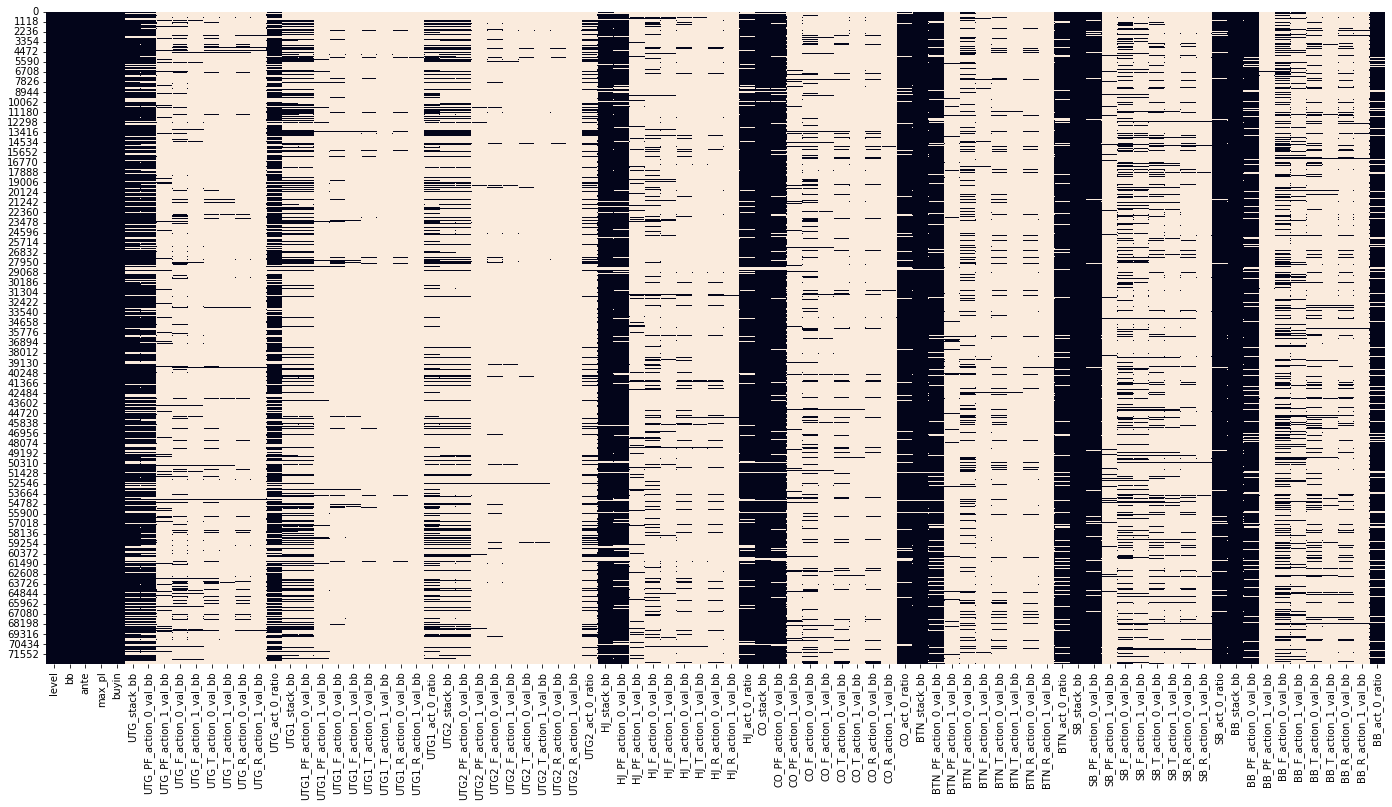

In [19]:
plt.figure(figsize=(24,12))
sns.heatmap(num_data.isna(), cbar=False)

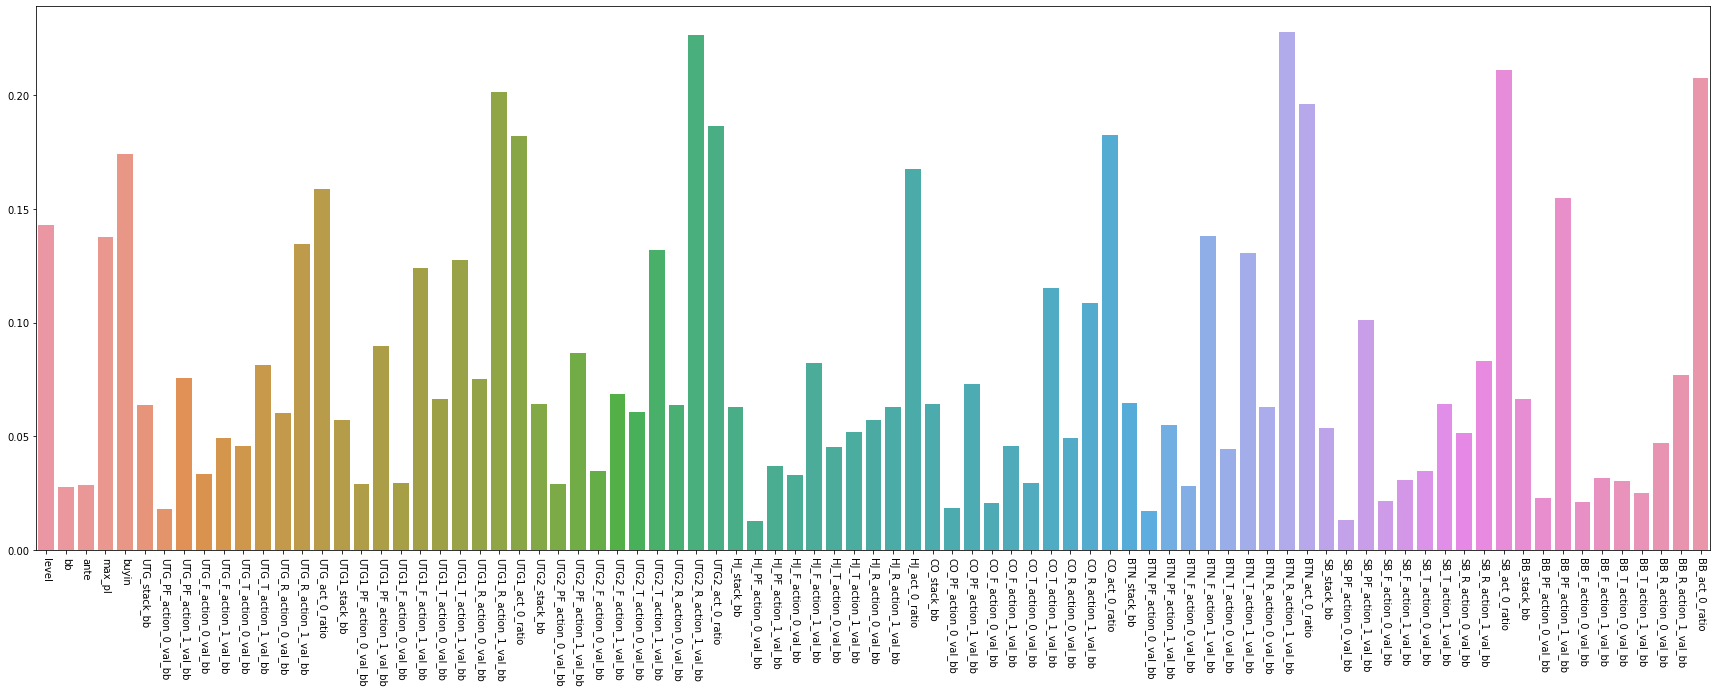

In [20]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=-90)
sns.barplot(x=stdev.index, y=stdev.values)

###Categorical data

In [21]:
cat_data.describe()

,current_street,hero_combo,hero_hand,hero_first_suit,hero_second_suit,hero_first_rank,hero_second_rank,hero_position,UTG_name,UTG_combo,UTG_hand,UTG_PF_action_0_move,UTG_PF_action_1_move,UTG_F_action_0_move,UTG_F_action_1_move,UTG_T_action_0_move,UTG_T_action_1_move,UTG_R_action_0_move,UTG_R_action_1_move,UTG1_name,UTG1_combo,UTG1_hand,UTG1_PF_action_0_move,UTG1_PF_action_1_move,UTG1_F_action_0_move,UTG1_F_action_1_move,UTG1_T_action_0_move,UTG1_T_action_1_move,UTG1_R_action_0_move,UTG1_R_action_1_move,UTG2_name,UTG2_combo,UTG2_hand,UTG2_PF_action_0_move,UTG2_PF_action_1_move,UTG2_F_action_0_move,UTG2_F_action_1_move,UTG2_T_action_0_move,UTG2_T_action_1_move,UTG2_R_action_0_move,UTG2_R_action_1_move,HJ_name,HJ_combo,HJ_hand,HJ_PF_action_0_move,HJ_PF_action_1_move,HJ_F_action_0_move,HJ_F_action_1_move,HJ_T_action_0_move,HJ_T_action_1_move,HJ_R_action_0_move,HJ_R_action_1_move,CO_name,CO_combo,CO_hand,CO_PF_action_0_move,CO_PF_action_1_move,CO_F_action_0_move,CO_F_action_1_move,CO_T_action_0_move,CO_T_action_1_move,CO_R_action_0_move,CO_R_action_1_move,BTN_name,BTN_combo,BTN_hand,BTN_PF_action_0_move,BTN_PF_action_1_move,BTN_F_action_0_move,BTN_F_action_1_move,BTN_T_action_0_move,BTN_T_action_1_move,BTN_R_action_0_move,BTN_R_action_1_move,SB_name,SB_combo,SB_hand,SB_PF_action_0_move,SB_PF_action_1_move,SB_F_action_0_move,SB_F_action_1_move,SB_T_action_0_move,SB_T_action_1_move,SB_R_action_0_move,SB_R_action_1_move,BB_name,BB_combo,BB_hand,BB_PF_action_0_move,BB_PF_action_1_move,BB_F_action_0_move,BB_F_action_1_move,BB_T_action_0_move,BB_T_action_1_move,BB_R_action_0_move,BB_R_action_1_move,Card_0,Card_0_rank,Card_0_suit,Card_1,Card_1_rank,Card_1_suit,Card_2,Card_2_rank,Card_2_suit,Card_3,Card_3_rank,Card_3_suit,Card_4,Card_4_rank,Card_4_suit,is_rainbow,is_triplet,is_monotone,has_pair,has_straightdraw,has_gutshot,has_flushdraw
count,72656,72332,72332,72332,72332,72332,72332,72332,59969,14505,14505,57534,6399,9611,2706,5358,1159,3375,556,21653,4940,4940,20673,2269,3189,824,1672,337,1025,153,16204,3732,3732,15434,1469,2507,547,1300,201,761,115,69843,17387,17387,67006,5860,11907,2092,6678,921,4215,440,71407,18246,18246,68367,4895,12882,1483,7263,641,4567,265,72266,18115,18115,66411,3614,13484,632,7433,258,4633,57,72655,20597,20597,69186,2936,17854,8274,9819,3708,6298,1968,72655,23024,23024,64856,530,27193,11652,14784,4460,9341,2056,50999,50999,50999,50999,50999,50999,50999,50999,50999,39106,39106,39106,32902,32902,32902,50999,50999,50999,50999,50999,50999,50999
unique,5,1326,170,4,4,13,13,10,16934,1326,174,3,3,5,3,5,3,5,3,8152,1221,174,3,3,5,3,5,3,5,3,7077,1160,174,3,3,5,3,5,3,5,3,17563,1326,174,3,3,5,3,5,3,5,3,17580,1325,173,3,3,5,3,5,3,5,3,17704,1326,173,3,3,5,3,5,3,5,3,17566,1326,171,3,3,5,3,5,3,5,3,17932,1326,171,4,3,5,3,5,3,5,3,52,13,4,52,13,4,52,13,4,52,13,4,52,13,4,2,2,2,2,2,2,2
top,SD,8h5s,T4o,s,c,A,2,BB,manggy94,QsQh,AQo,FOLD,CALL,CHECK,FOLD,CHECK,CALL,CHECK,FOLD,manggy94,AhKs,AKo,FOLD,CALL,CHECK,FOLD,CHECK,CALL,CHECK,FOLD,manggy94,AdJh,AKo,FOLD,CALL,CHECK,FOLD,CHECK,CALL,CHECK,FOLD,manggy94,9h9d,AKo,FOLD,CALL,CHECK,FOLD,CHECK,CALL,CHECK,FOLD,manggy94,QsQd,AKo,FOLD,CALL,CHECK,FOLD,CHECK,CALL,CHECK,FOLD,manggy94,AsQd,AKo,FOLD,CALL,BET,CALL,CHECK,CALL,CHECK,CALL,manggy94,9h9d,AKo,FOLD,FOLD,CHECK,FOLD,CHECK,FOLD,CHECK,FOLD,manggy94,QhQc,AJo,FOLD,CALL,CHECK,FOLD,CHECK,FOLD,CHECK,FOLD,3c,2,c,3d,3,s,7s,7,s,3h,3,h,4d,2,d,False,False,False,False,True,True,True
freq,28080,77,710,19203,19132,10857,10833,12033,9223,38,297,41079,3680,4485,1429,2424,571,1531,299,2777,16,122,14825,1249,1323,447,698,158,431,81,2016,15,90,11041,812,944,303,487,103,333,60,11061,42,365,47134,3323,4496,1087,2577,427,1718,250,11630,48,361,47079,2586,4133,723,2546,324,1658,134,11596,43,326,44385,1793,4146,325,2191,139,1567,27,12023,46,374,42254,1446,12287,4712,6333,1760,3740,1191,12033,54,376,31376,346,18686,7124,8778,2292,5008,1251,1088,4074,12975,1056,4107,12803,1041,4048,12877,823,3141,9879,691,2622,8338,30972,50886,48238,42158,42652,46639,30972


In [22]:
max_missing_ratio = 0.99
cat_missing_ratio = cat_data.isna().sum()/cat_data.shape[0]
kept_cat_cols = cat_data.columns[cat_missing_ratio < max_missing_ratio]
dropped_cat_cols = cat_data.columns[cat_missing_ratio >= max_missing_ratio]

In [23]:
cat_missing_ratio.sort_values(ascending=False)

BTN_R_action_1_move      0.999215
UTG2_R_action_1_move     0.998417
UTG1_R_action_1_move     0.997894
UTG2_T_action_1_move     0.997234
BTN_T_action_1_move      0.996449
CO_R_action_1_move       0.996353
UTG1_T_action_1_move     0.995362
HJ_R_action_1_move       0.993944
BB_PF_action_1_move      0.992705
UTG2_F_action_1_move     0.992471
UTG_R_action_1_move      0.992348
BTN_F_action_1_move      0.991301
CO_T_action_1_move       0.991178
UTG2_R_action_0_move     0.989526
UTG1_F_action_1_move     0.988659
HJ_T_action_1_move       0.987324
UTG1_R_action_0_move     0.985892
UTG_T_action_1_move      0.984048
UTG2_T_action_0_move     0.982107
UTG2_PF_action_1_move    0.979781
CO_F_action_1_move       0.979589
UTG1_T_action_0_move     0.976987
SB_R_action_1_move       0.972913
BB_R_action_1_move       0.971702
HJ_F_action_1_move       0.971207
UTG1_PF_action_1_move    0.968771
UTG2_F_action_0_move     0.965495
UTG_F_action_1_move      0.962756
SB_PF_action_1_move      0.959590
UTG1_F_action_

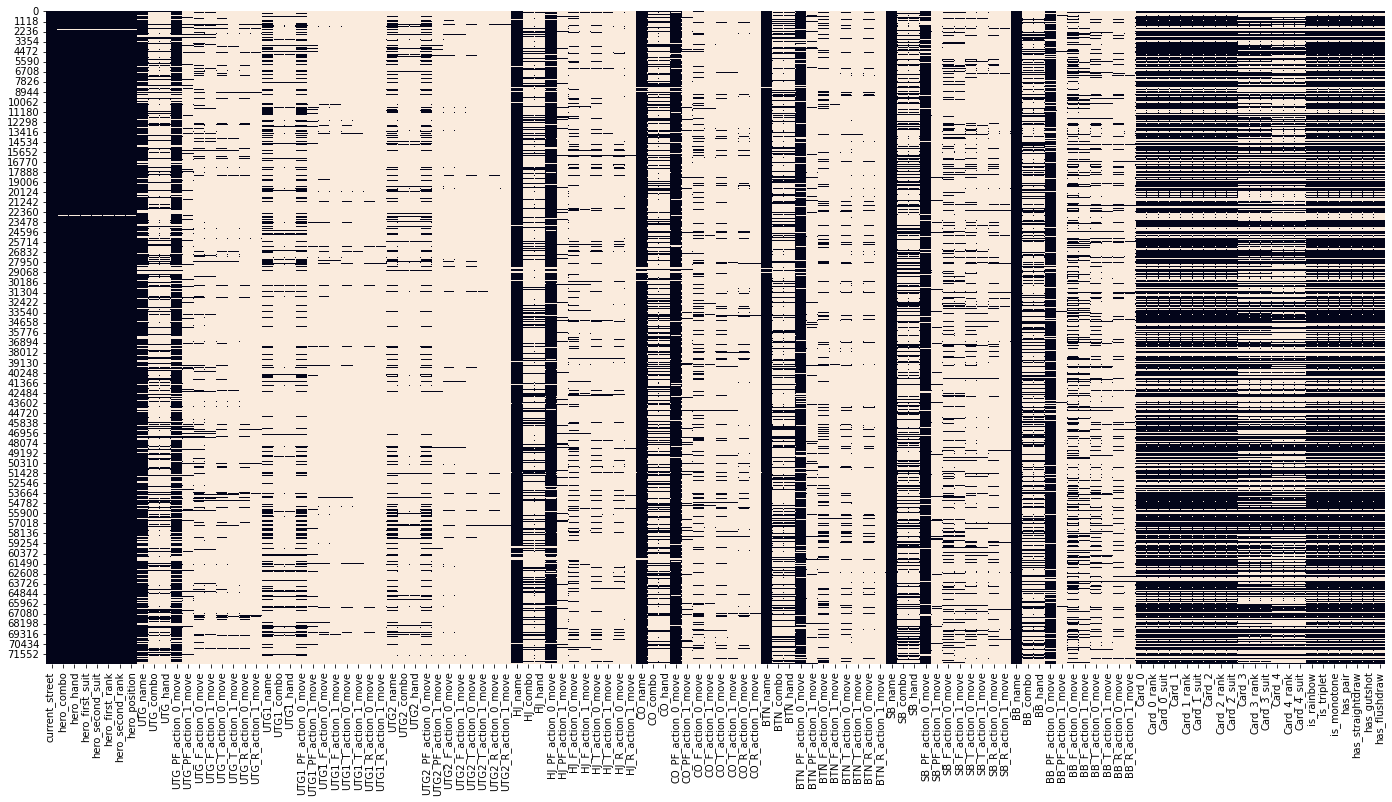

In [24]:
plt.figure(figsize=(24,12))
sns.heatmap(cat_data.isna(), cbar=False)

---

#Working with a more adapted dataset




##Creating a DataFrame adapted for target observation
**Création d'un DataFrame adapté à l'observation des cibles**


After preliminary observation, we can say that a lot of data is missing in the original dataset. What is more, it has a lot of columns which look alike since each player has to face the same steps in a poker round. 

I think it would be a smart move to reduce features dimension and increase data points by splitting information for each player in a hand history.

Thus, we will create a new DataFrame in which we'll be able to observe targets and compare the influence of positions on the table







***Only a part of data features is selected to be observed***

*Seule une partie des caractéristiques des données est sélectionnée pour être observée.*

We'll only into account positions for 6-max poker that represent almost 70% of all hand histories observed (check cat_missing_ratio for UTG1_name). 

Thus, we intend to drop a lot of columns containing missing values.

In [25]:
interest_pos = ["UTG_", "HJ_", "CO_", "BTN_", "SB_", "BB_"]

Also, we will correct values and dtypes that are not relevant. Also a lot of columns are being left aside for the moment.

In [26]:
dico = {}
for x in str_hands:
  dico[x] = f"{x}"
dico["22.0"] = "22"
dico["33.0"] = "33"
dico["44.0"] = "44"
dico["55.0"] = "55"
dico["66.0"] = "66"
dico["77.0"] = "77"
dico["88.0"] = "88"
dico["99.0"] = "99"
dico["None"] = "None"
card_cols = [x for x in data.columns if "Card" in x]
hero_cols = [x for x in data.columns if "hero" in x]
flop_cols = [x for x in data.columns if "is" in x or "has" in x]

In [27]:
to_concat =[]
for pos in interest_pos:
  n = len(pos)
  cols = [x for x in data.columns if pos in x ]
  new_cols = [x[n:] for x in cols]
  cols = ["level", "bb", "max_pl", "current_street"]+ hero_cols + cols + card_cols + flop_cols 
  new_cols = ["level", "bb", "max_pl", "current_street"] + hero_cols + new_cols + card_cols + flop_cols + ["position"]
  data_tab = data[cols].to_numpy()
  position = np.ones((data.shape[0],1)).astype(str)
  position[:] = pos[:-1]
  data_tab = np.concatenate((data_tab, position), axis=1)
  concat_df = pd.DataFrame(columns=new_cols, data=data_tab)
  to_concat.append(concat_df)
obs_data= pd.concat(to_concat).reset_index(drop=True)
obs_data["hand"] = obs_data["hand"].map(dico)
obs_data["hero_hand"] = obs_data["hand"].map(dico)
#del(to_concat, n, new_cols, cols, position, concat_df, data_tab, dico)

In [28]:
dtypes = {}
for x in obs_data.columns:
  if "move" in x:
    dtypes[x] = np.dtype(str)
  elif "val" in x or "stack" in x or "ratio" in x or "bb" in x:
    dtypes[x] = np.dtype(float)
  elif x == "level" or x == "max_pl":
    dtypes[x] = np.dtype(int)
  else:
    dtypes[x] = np.dtype(str)
obs_data = obs_data.astype(dtypes)
obs_data.where(obs_data!="nan", np.nan, inplace=True)
#del(dtypes)

##Observations on the newly created DataFrame

Once again, we check the different features present in the dataset and its shape


In [29]:
obs_data.head()

,level,bb,max_pl,current_street,hero_combo,hero_hand,hero_first_suit,hero_second_suit,hero_first_rank,hero_second_rank,hero_position,name,stack,stack_bb,combo,hand,PF_action_0_move,PF_action_0_val,PF_action_0_val_bb,PF_action_1_move,PF_action_1_val,PF_action_1_val_bb,F_action_0_move,F_action_0_val,F_action_0_val_bb,F_action_1_move,F_action_1_val,F_action_1_val_bb,T_action_0_move,T_action_0_val,T_action_0_val_bb,T_action_1_move,T_action_1_val,T_action_1_val_bb,R_action_0_move,R_action_0_val,R_action_0_val_bb,R_action_1_move,R_action_1_val,R_action_1_val_bb,act_0_ratio,Card_0,Card_0_rank,Card_0_suit,Card_1,Card_1_rank,Card_1_suit,Card_2,Card_2_rank,Card_2_suit,Card_3,Card_3_rank,Card_3_suit,Card_4,Card_4_rank,Card_4_suit,is_rainbow,is_triplet,is_monotone,has_pair,has_straightdraw,has_gutshot,has_flushdraw,position
0,6,400.0,9,SD,9c6s,AJo,c,s,9,6,CO,Remundo63,10000.0,25.000,AhJs,AJo,RAISE,400.0,1.0,CALL,9170.0,22.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,5d,5,d,4d,4,d,8s,8,s,Qs,Q,s,4c,4,c,False,False,False,False,True,True,True,UTG
1,6,400.0,9,PF,9s7d,None,s,d,9,7,HJ,mickkey59,9970.0,24.925,None,None,FOLD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,None,None,None,None,None,None,None,UTG
2,6,400.0,9,SD,Qc9s,None,c,s,Q,9,UTG1,Le Yougo13,9940.0,24.850,None,None,FOLD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,5s,5,s,2h,2,h,4d,4,d,7s,7,s,Kh,K,h,True,False,False,False,True,True,False,UTG
3,6,400.0,9,SD,7h4d,74o,h,d,7,4,UTG,manggy94,9510.0,23.775,7h4d,74o,FOLD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,3h,3,h,6d,6,d,Tc,T,c,As,A,s,4s,4,s,True,False,False,False,True,True,False,UTG
4,7,500.0,9,SD,Qs6s,None,s,s,Q,6,BB,Skill-78,21580.0,43.160,None,None,FOLD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,8s,8,s,8c,8,c,Ad,A,d,3d,3,d,5c,5,c,True,False,False,True,False,False,False,UTG


In [30]:
obs_data.shape

(435936, 64)

In [31]:
print(f"As of {datetime.date.today()}, the dataset contains {obs_data.shape[0]} data points, and {obs_data.shape[1]} features")

As of 2022-03-06, the dataset contains 435936 data points, and 64 features


This time, the target column, will be **"hand"** columns, or **"combo"** columns. 

Now we can check the data type of each column

In [32]:
obs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435936 entries, 0 to 435935
Data columns (total 64 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   level               435936 non-null  int64  
 1   bb                  435936 non-null  float64
 2   max_pl              435936 non-null  int64  
 3   current_street      435936 non-null  object 
 4   hero_combo          435936 non-null  object 
 5   hero_hand           186394 non-null  object 
 6   hero_first_suit     435936 non-null  object 
 7   hero_second_suit    435936 non-null  object 
 8   hero_first_rank     435936 non-null  object 
 9   hero_second_rank    435936 non-null  object 
 10  hero_position       434922 non-null  object 
 11  name                418795 non-null  object 
 12  stack               418795 non-null  float64
 13  stack_bb            418795 non-null  float64
 14  combo               418795 non-null  object 
 15  hand                186394 non-nul

Now we can check for missing values in this new dataset

In [33]:
pd.DataFrame(obs_data.isnull().sum()/obs_data.size*100).T

,level,bb,max_pl,current_street,hero_combo,hero_hand,hero_first_suit,hero_second_suit,hero_first_rank,hero_second_rank,hero_position,name,stack,stack_bb,combo,hand,PF_action_0_move,PF_action_0_val,PF_action_0_val_bb,PF_action_1_move,PF_action_1_val,PF_action_1_val_bb,F_action_0_move,F_action_0_val,F_action_0_val_bb,F_action_1_move,F_action_1_val,F_action_1_val_bb,T_action_0_move,T_action_0_val,T_action_0_val_bb,T_action_1_move,T_action_1_val,T_action_1_val_bb,R_action_0_move,R_action_0_val,R_action_0_val_bb,R_action_1_move,R_action_1_val,R_action_1_val_bb,act_0_ratio,Card_0,Card_0_rank,Card_0_suit,Card_1,Card_1_rank,Card_1_suit,Card_2,Card_2_rank,Card_2_suit,Card_3,Card_3_rank,Card_3_suit,Card_4,Card_4_rank,Card_4_suit,is_rainbow,is_triplet,is_monotone,has_pair,has_straightdraw,has_gutshot,has_flushdraw,position
0,0.0,0.0,0.0,0.0,0.0,0.894419,0.0,0.0,0.0,0.0,0.003634,0.061437,0.061437,0.061437,0.061437,0.894419,0.152603,0.152603,0.152603,1.475639,1.475639,1.475639,1.229413,1.229413,1.229413,1.466303,1.466303,1.466303,1.378503,1.378503,1.378503,1.522546,1.522546,1.522546,1.446267,1.446267,1.446267,1.543353,1.543353,1.543353,0.152603,0.465744,0.0,0.0,0.465744,0.0,0.0,0.465744,0.0,0.0,0.721508,0.0,0.0,0.854928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
obs_data.select_dtypes(include=np.number).describe()

,level,bb,max_pl,stack,stack_bb,PF_action_0_val,PF_action_0_val_bb,PF_action_1_val,PF_action_1_val_bb,F_action_0_val,F_action_0_val_bb,F_action_1_val,F_action_1_val_bb,T_action_0_val,T_action_0_val_bb,T_action_1_val,T_action_1_val_bb,R_action_0_val,R_action_0_val_bb,R_action_1_val,R_action_1_val_bb,act_0_ratio
count,435936.000000,4.359360e+05,435936.000000,4.187950e+05,418795.000000,3.933600e+05,393360.000000,2.423400e+04,24234.000000,9.293100e+04,92931.000000,2.683900e+04,26839.000000,5.133500e+04,51335.000000,1.114700e+04,11147.000000,3.242900e+04,32429.000000,5.342000e+03,5342.000000,393360.000000
mean,10.175374,5.161102e+03,6.659780,1.139759e+05,56.992482,6.793947e+03,1.946344,1.392653e+04,8.532069,5.184579e+03,2.826725,5.055674e+03,4.354166,4.898739e+03,3.445841,5.562194e+03,5.710043,5.972048e+03,5.655522,4.673197e+03,6.198793,0.055078
std,7.854108,3.862828e+04,1.102497,8.829052e+05,53.846235,2.007266e+05,11.886109,2.325277e+05,21.381965,8.981739e+04,11.931213,3.395181e+04,15.053020,8.693566e+04,11.677414,4.429941e+04,16.308574,6.883454e+04,16.691541,3.236698e+04,15.823329,0.189177
min,0.000000,2.000000e+01,2.000000,2.000000e+00,0.000800,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2.500000e+02,6.000000,1.540550e+04,20.640000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,9.000000,6.000000e+02,6.000000,2.406400e+04,40.012500,0.000000e+00,0.000000,5.600000e+02,1.500000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.520000e+02,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
75%,14.000000,1.600000e+03,8.000000,5.806650e+04,78.116667,3.250000e+02,1.000000,4.667000e+03,6.600000,1.000000e+03,2.150000,1.400000e+03,3.000000,1.388000e+03,2.812500,2.496500e+03,5.200000,2.019000e+03,4.500000,2.453000e+03,5.750000,0.015019
max,55.000000,1.400000e+06,10.000000,8.115331e+07,1002.460000,4.979921e+07,1001.340000,2.193601e+07,569.342857,1.211588e+07,685.000000,2.339000e+06,491.333333,1.403925e+07,464.525000,2.250221e+06,654.591667,8.376102e+06,389.350000,1.313250e+06,370.912000,1.000000


In [35]:
obs_data.select_dtypes(exclude=np.number).describe()

,current_street,hero_combo,hero_hand,hero_first_suit,hero_second_suit,hero_first_rank,hero_second_rank,hero_position,name,combo,hand,PF_action_0_move,PF_action_1_move,F_action_0_move,F_action_1_move,T_action_0_move,T_action_1_move,R_action_0_move,R_action_1_move,Card_0,Card_0_rank,Card_0_suit,Card_1,Card_1_rank,Card_1_suit,Card_2,Card_2_rank,Card_2_suit,Card_3,Card_3_rank,Card_3_suit,Card_4,Card_4_rank,Card_4_suit,is_rainbow,is_triplet,is_monotone,has_pair,has_straightdraw,has_gutshot,has_flushdraw,position
count,435936,435936,186394,435936,435936,435936,435936,434922,418795,418795,186394,393360,24234,92931,26839,51335,11147,32429,5342,305994,435936,435936,305994,435936,435936,305994,435936,435936,234636,435936,435936,197412,435936,435936,435936,435936,435936,435936,435936,435936,435936,435936
unique,5,1327,170,5,5,14,14,11,21994,1327,170,4,3,5,3,5,3,5,3,52,14,5,52,14,5,52,14,5,52,14,5,52,14,5,3,3,3,3,3,3,3,6
top,SD,None,None,s,c,A,2,BB,manggy94,None,None,FOLD,CALL,CHECK,FOLD,CHECK,FOLD,CHECK,FOLD,3c,None,None,3d,None,None,7s,None,None,3h,None,None,4d,None,None,False,False,False,False,True,True,True,UTG
freq,168480,1944,74520,115218,114792,65142,64998,72198,67566,306921,74520,253307,13079,47528,15319,24849,5321,15222,3152,6528,129942,129942,6336,129942,129942,6246,129942,129942,4938,201300,201300,4146,238524,238524,185832,305316,289428,252948,255912,279834,185832,72656


#Target analyse

In [36]:
hand_labels = obs_data["hand"].where(obs_data["hand"] != "None").dropna().reset_index(drop=True)

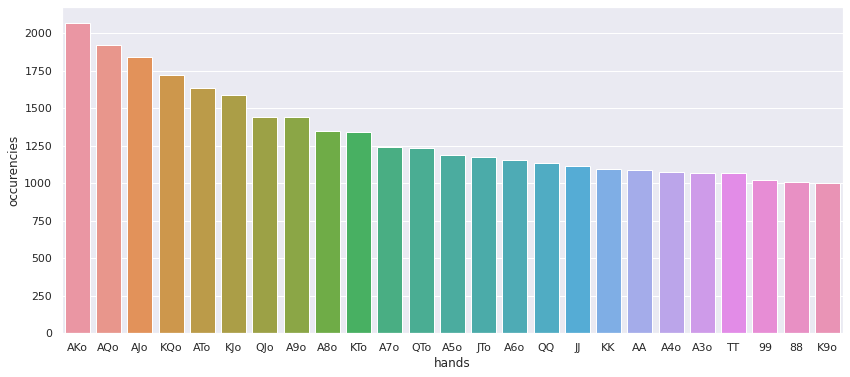

In [37]:
showdown_hands = hand_labels.value_counts().rename_axis(index="hands").rename("occurencies")
sns.set(rc={'figure.figsize':(14,6)})
k=25
#k = int(input("Enter the number of different poker hands you want to see(max 169)\n"))
observed_hands = showdown_hands.iloc[:k]
cum_ratio = observed_hands.sum()/showdown_hands.sum()
overall_ratio = k/169
graph = sns.barplot(x="hands", y="occurencies", data=observed_hands.reset_index())
del(k)

As I write these lines, we can observe that The 10-most encountered hands at  showdown represent 18.3% of the hands encounterd at showdown whereas it's 5.9% of all possible hands for poker.

They are 2.0 times more present than the other combos. This unequal repartition can be observed on this graph


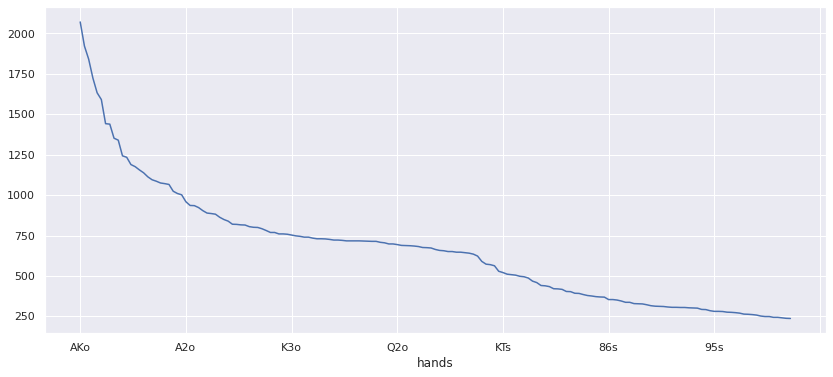

In [38]:
print(f"They are {round(cum_ratio/overall_ratio,1)} times more present than the other combos. This unequal repartition can be observed on this graph")
showdown_hands.plot(x="hands").bar
del(cum_ratio, overall_ratio, showdown_hands)

Hands shown do not have the same repartition. Most of the hands that are shown at ShowDown in poker are the strongest ofsuit hands. Then we have the strongest pairs and finally the strongest suited hands. This comes from the unequal repartition of these 3 kinds of hands among all the combos. For example, we have 16 combos for AKo, 6 combos for AA or KK, and only 4 combos of AKs thus what we can observe in previous graphs

In [39]:
obs_data.groupby("hand").mean().drop(["level", "bb", "max_pl", "stack", "stack_bb"], axis=1).drop([x for x in obs_data.columns if ("val" in x and "bb" not in x)], axis=1)

,PF_action_0_val_bb,PF_action_1_val_bb,F_action_0_val_bb,F_action_1_val_bb,T_action_0_val_bb,T_action_1_val_bb,R_action_0_val_bb,R_action_1_val_bb,act_0_ratio
hand,,,,,,,,,
22,7.812455,13.357269,2.716605,8.390357,3.030853,6.540272,7.958840,13.853089,0.213747
32o,1.048557,10.091875,3.399100,5.884940,0.989024,8.252179,2.568611,5.491667,0.018660
32s,0.943057,2.819422,3.844332,8.497556,1.782474,3.469208,4.209500,6.406250,0.044918
33,7.432057,19.487757,2.877462,14.226446,2.873405,26.217517,3.390907,6.150464,0.224357
42o,0.348418,1.451667,0.814295,1.333134,2.165110,1.833333,1.222458,1.653333,0.011745
42s,1.195807,9.369607,2.458811,4.399621,1.552667,13.505667,3.149599,6.000000,0.035936
43o,0.752632,12.502812,0.645509,6.538080,3.210004,2.745357,4.236093,2.542679,0.017338
43s,1.529224,4.254010,3.880046,8.573408,3.667204,5.383779,6.734259,7.536905,0.046461
44,9.545984,13.972707,2.910884,8.144111,2.769783,9.556027,3.113751,16.038006,0.282409


Now we can see there can be a huge difference on some data depending on the hand. We'll push the analyse furthur

##Defining Hand groups
**Définition des groupes de main**

***The hands are grouped by strength and similarity in order to visualize the trends on our dataset concerning the first variables observed in a move.***

*Les mains sont regroupées par groupe de force et similarité afin de pouvoir visualiser les tendances sur notre dataset concernant les premières variables observées dans un coup.*

In [40]:
from API.listings import all_hands

In [41]:
positions = obs_data["position"].value_counts().index.to_numpy()
actions = ["FOLD", "CHECK", "CALL", "BET", "RAISE"]
pf_actions = ["FOLD", "CHECK", "CALL", "RAISE"]
bet_actions = ["CALL","BET", "RAISE"]
pf_bet_actions = ["CALL", "RAISE"]

In [42]:
high_A = np.array([f"{x}" for x in all_hands if "A" in x.first.value ])
high_K = np.array([f"{x}" for x in all_hands if "K" in x.first.value ])
high_Q = np.array([f"{x}" for x in all_hands if "Q" in x.first.value ])
high_T = np.array([f"{x}" for x in all_hands if "T" in x.first.value ])
high_9 = np.array([f"{x}" for x in all_hands if "9" in x.first.value ])
high_8 = np.array([f"{x}" for x in all_hands if "8" in x.first.value ])
high_7 = np.array([f"{x}" for x in all_hands if "7" in x.first.value ])
high_6 = np.array([f"{x}" for x in all_hands if "6" in x.first.value ])
high_5 = np.array([f"{x}" for x in all_hands if "5" in x.first.value ])
high_4 = np.array([f"{x}" for x in all_hands if "4" in x.first.value ])
high_3 = np.array([f"{x}" for x in all_hands if "3" in x.first.value ])
suited = np.array([f"{x}" for x in all_hands if x.is_suited])
offsuits = np.array([f"{x}" for x in all_hands if x.is_offsuit])
pairs = np.array([f"{x}" for x in all_hands if x.is_pair])
broadways = np.array([f"{x}" for x in all_hands if x.is_broadway])
connectors = np.array([f"{x}" for x in all_hands if x.is_connector])
one_gappers = np.array([f"{x}" for x in all_hands if x.is_one_gapper])
two_gappers = np.array([f"{x}" for x in all_hands if x.is_two_gapper])
suited_A = np.intersect1d(high_A, suited)
suited_connectors = np.intersect1d(suited, connectors)
offsuit_connectors = np.intersect1d(offsuits, connectors)
suited_broadways = np.intersect1d(suited, broadways)
offsuit_broadways = np.intersect1d(offsuits, broadways)
suited_one_gappers = np.intersect1d(suited, one_gappers)
suited_two_gappers = np.intersect1d(suited, two_gappers)
premium_pairs = np.intersect1d(broadways, pairs)
top_hands = np.union1d(premium_pairs, ["AKs", "AKo", "AQo", "AQs"])
very_good_hands = np.union1d(top_hands, suited_broadways)
good_enough_hands = np.unique(np.hstack((broadways, pairs, suited_connectors, high_A, suited_one_gappers)))
trash_hands = np.array([x for x in str_hands if x not in good_enough_hands])

## Restrictions
**Restrictions**

***It has been chosen to visualize hands that went to showdown, and for 6-max poker positions only***

*Il a été choisi pour visualiser les mains qui sont allées au showdown, et pour les positions de poker 6-max uniquement.*

In [43]:
filter1 =~ obs_data["hand"].isin(["None", np.NaN])
shown_hands = obs_data[filter1].reset_index(drop=True)
filter2 = shown_hands["max_pl"] <7
short_handed = shown_hands[filter2].reset_index(drop=True)
filter3 = short_handed["current_street"] == "SD"
WTSD = short_handed[filter3].reset_index(drop=True)

In [44]:
by_hand = short_handed.groupby("hand")

In [45]:
bets_by_hand = by_hand.mean().drop(["level", "bb", "max_pl", "stack", "stack_bb"], axis=1).drop([x for x in obs_data.columns if ("val" in x and "bb" not in x)], axis=1)

In [46]:
shown_hands.shape, short_handed.shape, WTSD.shape

((111874, 64), (76588, 64), (44369, 64))

##First analyse of short handed hands

In [47]:
short_handed.head()

,level,bb,max_pl,current_street,hero_combo,hero_hand,hero_first_suit,hero_second_suit,hero_first_rank,hero_second_rank,hero_position,name,stack,stack_bb,combo,hand,PF_action_0_move,PF_action_0_val,PF_action_0_val_bb,PF_action_1_move,PF_action_1_val,PF_action_1_val_bb,F_action_0_move,F_action_0_val,F_action_0_val_bb,F_action_1_move,F_action_1_val,F_action_1_val_bb,T_action_0_move,T_action_0_val,T_action_0_val_bb,T_action_1_move,T_action_1_val,T_action_1_val_bb,R_action_0_move,R_action_0_val,R_action_0_val_bb,R_action_1_move,R_action_1_val,R_action_1_val_bb,act_0_ratio,Card_0,Card_0_rank,Card_0_suit,Card_1,Card_1_rank,Card_1_suit,Card_2,Card_2_rank,Card_2_suit,Card_3,Card_3_rank,Card_3_suit,Card_4,Card_4_rank,Card_4_suit,is_rainbow,is_triplet,is_monotone,has_pair,has_straightdraw,has_gutshot,has_flushdraw,position
0,8,600.0,6,F,Qh7h,Q7s,h,h,Q,7,UTG,manggy94,21730.0,36.216667,Qh7h,Q7s,CALL,600.0,1.0,CALL,3060.0,5.1,CHECK,0.0,0.0,FOLD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027612,Js,J,s,2d,2,d,Kc,K,c,NaN,None,None,NaN,None,None,True,False,False,False,True,True,False,UTG
1,8,600.0,6,SD,Qc7d,QTo,c,d,Q,7,SB,Emma57,15626.0,26.043333,QsTh,QTo,CALL,600.0,1.0,NaN,NaN,NaN,CALL,600.0,1.0,NaN,NaN,NaN,RAISE,4260.0,7.1,CALL,9506.0,15.843333,NaN,NaN,NaN,NaN,NaN,NaN,0.038398,6s,6,s,2s,2,s,5d,5,d,Qd,Q,d,9c,9,c,False,False,False,False,True,True,True,UTG
2,8,600.0,6,SD,5c2s,52o,c,s,5,2,UTG,manggy94,31164.0,51.940000,5c2s,52o,FOLD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9s,9,s,9h,9,h,7s,7,s,6h,6,h,Th,T,h,False,False,False,True,True,True,True,UTG
3,9,800.0,6,SD,5d2c,52o,d,c,5,2,UTG,manggy94,66737.0,83.421250,5d2c,52o,FOLD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3c,3,c,8c,8,c,2d,2,d,Th,T,h,2h,2,h,False,False,False,False,True,True,True,UTG
4,9,800.0,6,SD,8h2s,82o,h,s,8,2,UTG,manggy94,19380.0,24.225000,8h2s,82o,FOLD,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,6d,6,d,Ac,A,c,8c,8,c,Kh,K,h,Ks,K,s,False,False,False,False,True,True,True,UTG


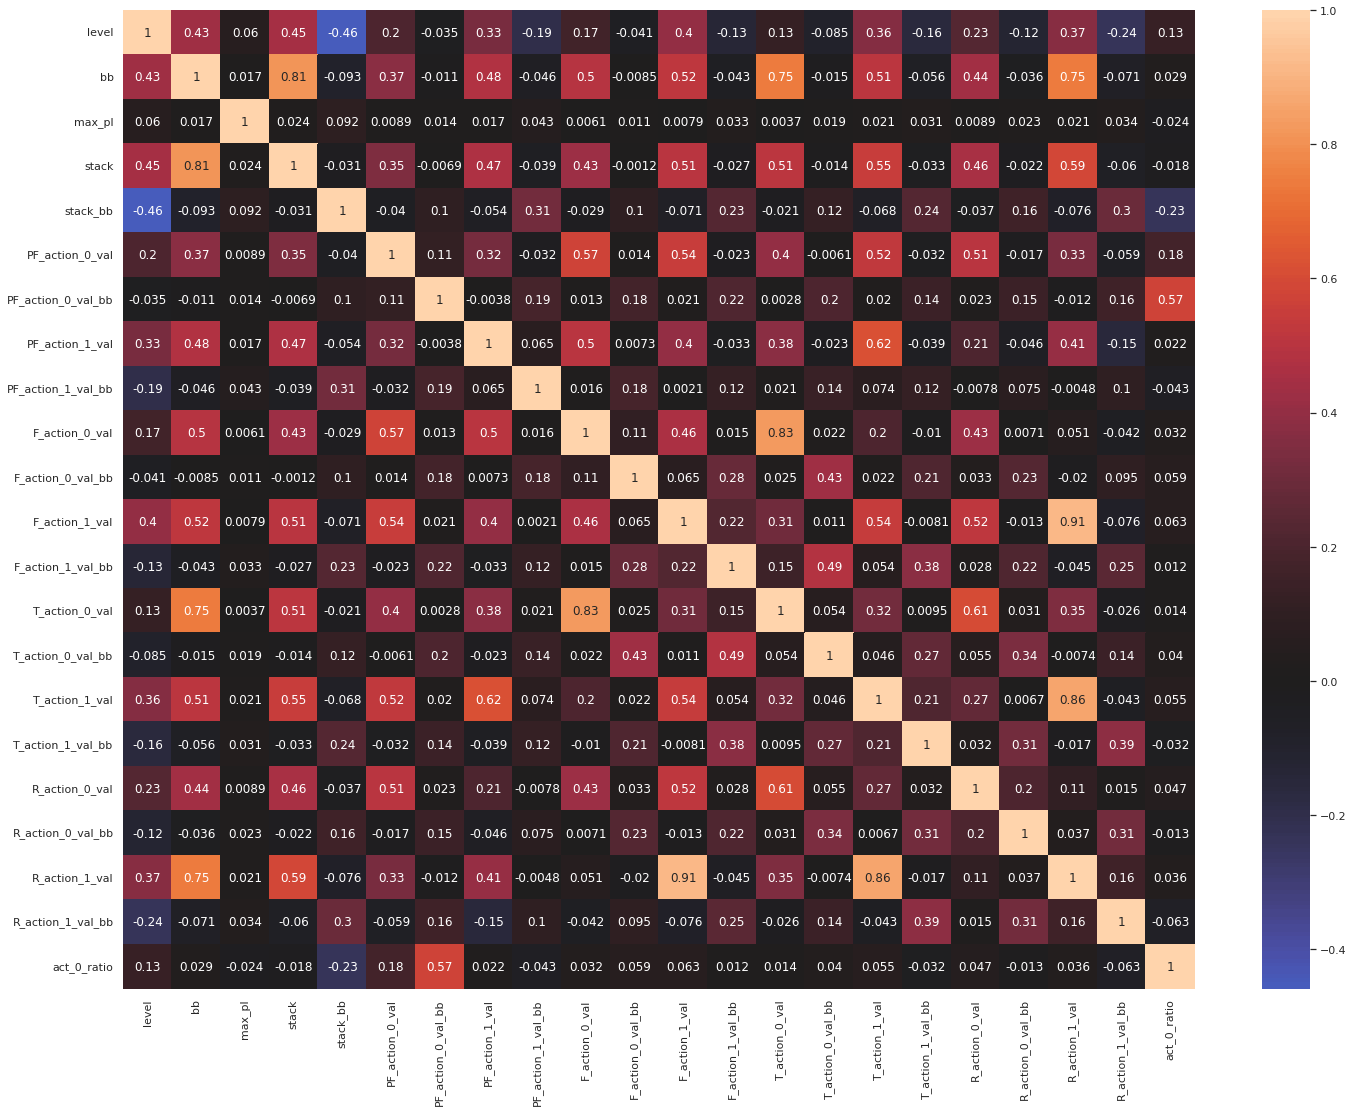

In [48]:
plt.figure(figsize=(24,18))
corr = short_handed.corr()
sns.heatmap(corr, center=0, annot=True)

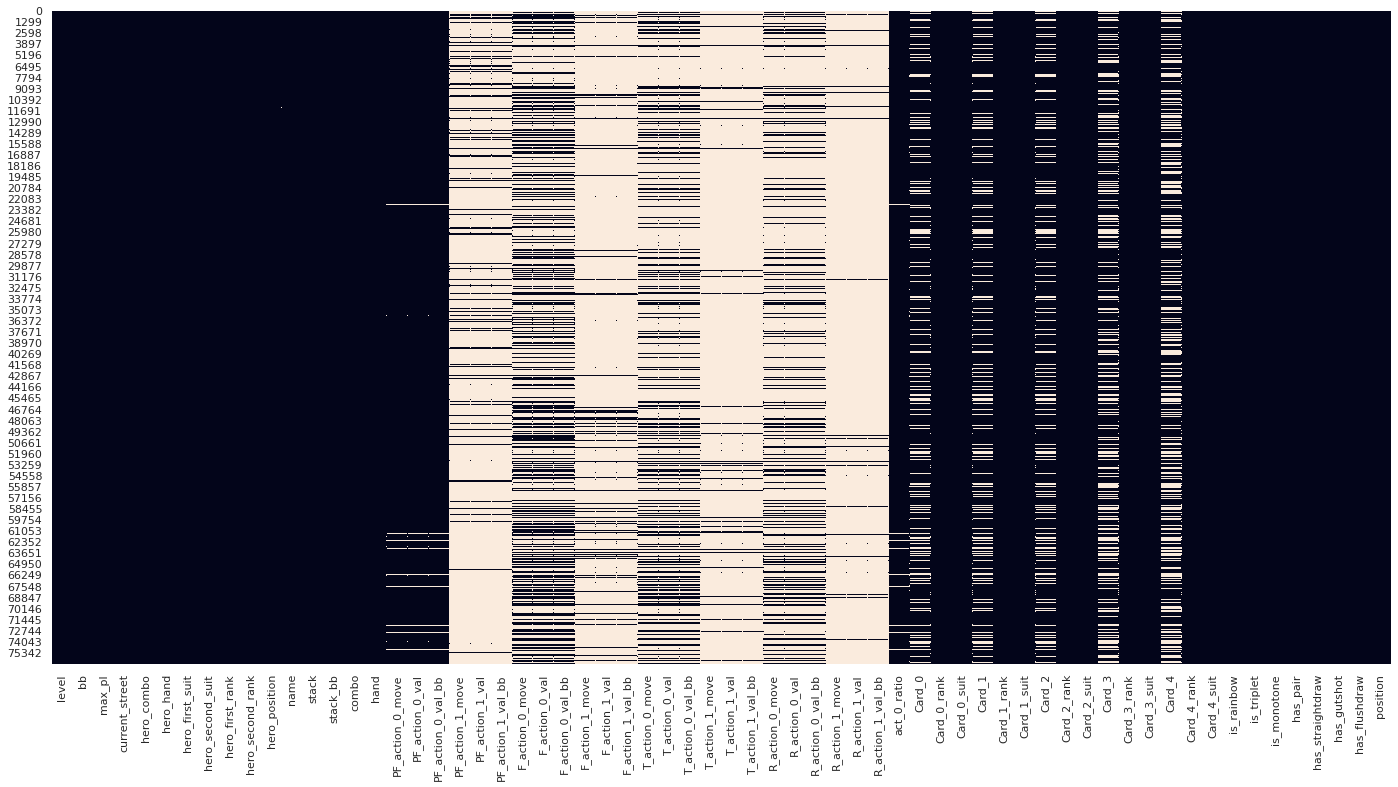

In [49]:
plt.figure(figsize=(24,12))
sns.heatmap(short_handed.isna(), cbar=False)

In [166]:
short_handed["act_1_ratio"] = short_handed["PF_action_1_val_bb"]/short_handed["stack"]

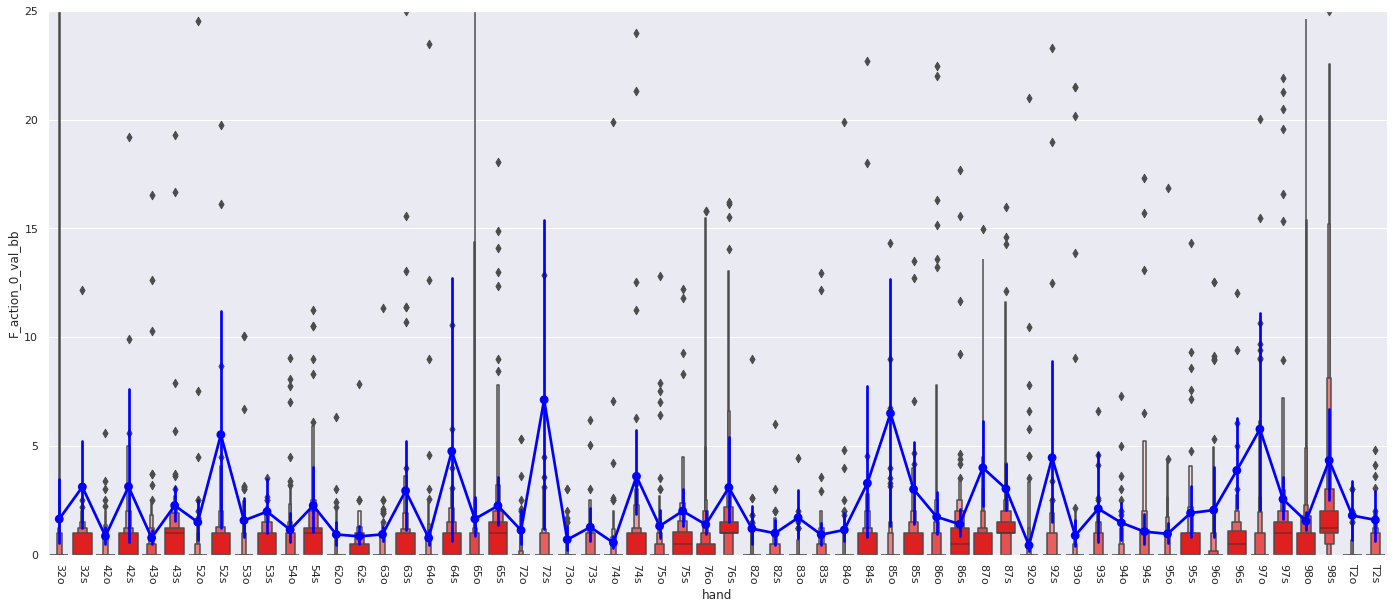

In [50]:
plt.figure(figsize=(24, 10))
plt.xticks(rotation=-90)
plt.ylim((0,25))
sns.boxenplot(data=short_handed, x="hand", y="PF_action_0_val_bb", order=str_hands[:58], color="red")
sns.pointplot(data=short_handed, x="hand", y="F_action_0_val_bb", order=str_hands[:58], color="blue")

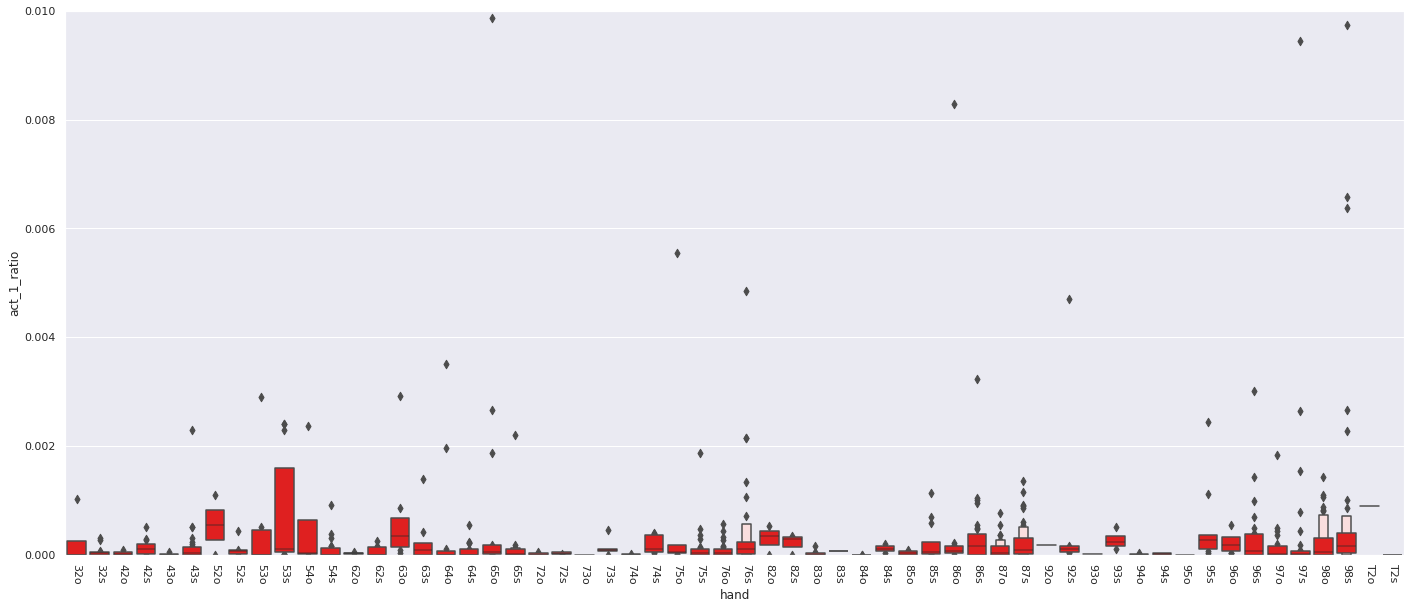

In [169]:
plt.figure(figsize=(24, 10))
plt.xticks(rotation=-90)
plt.ylim((0,0.01))
sns.boxenplot(data=short_handed, x="hand", y="act_1_ratio", order=str_hands[:58], color="red")

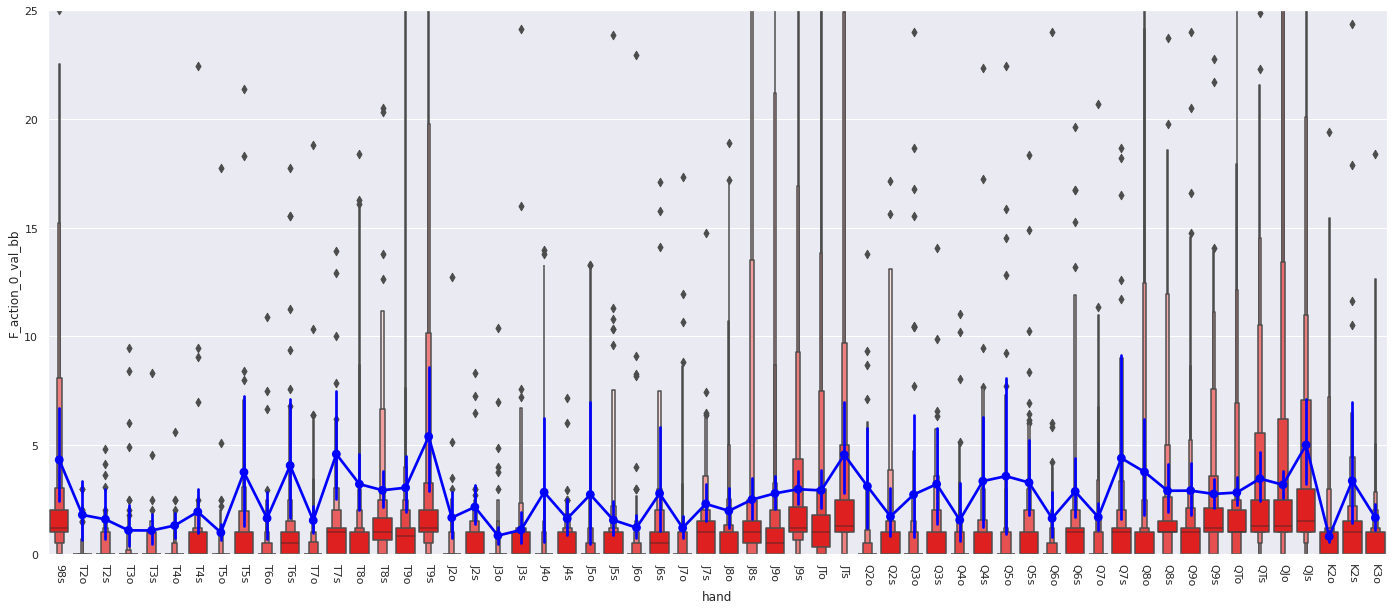

In [51]:
plt.figure(figsize=(24, 10))
plt.ylim((0,25))
plt.xticks(rotation=-90)
sns.boxenplot(data=short_handed, x="hand", y="PF_action_0_val_bb", order=str_hands[55:113], color="red")
sns.pointplot(data=short_handed, x="hand", y="F_action_0_val_bb", order=str_hands[55:113], color="blue")

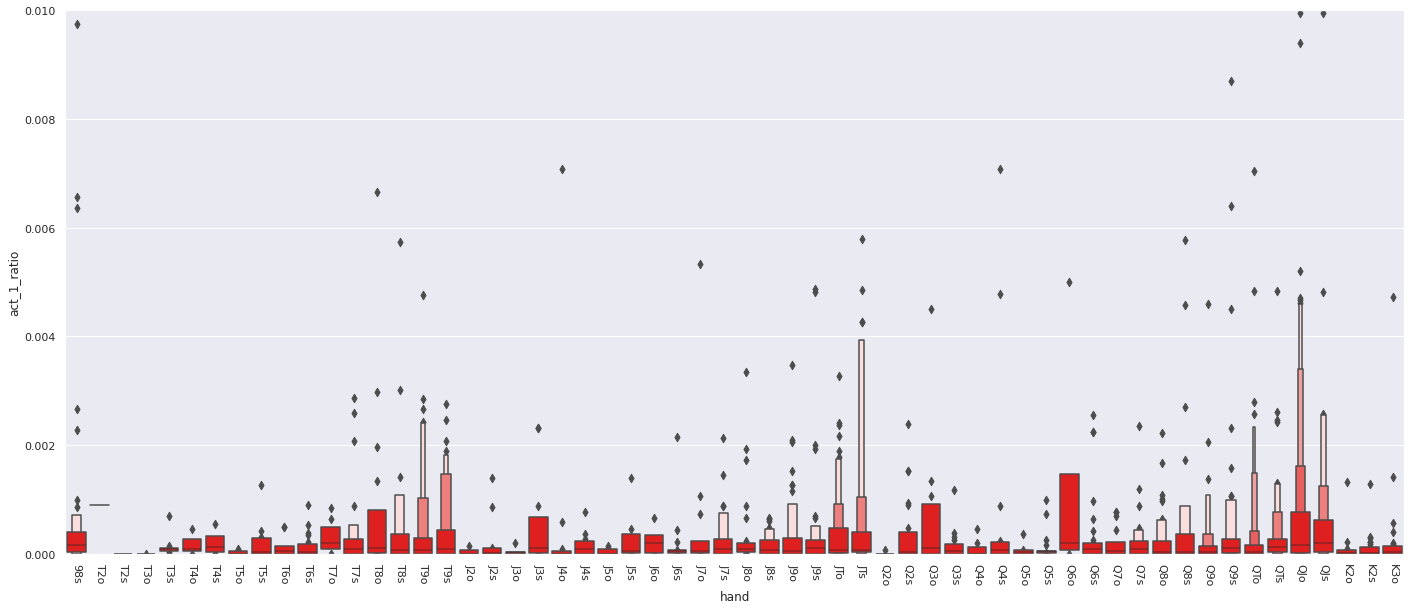

In [171]:
plt.figure(figsize=(24, 10))
plt.xticks(rotation=-90)
plt.ylim((0,1/100))
sns.boxenplot(data=short_handed, x="hand", y="act_1_ratio", order=str_hands[55:113], color="red")

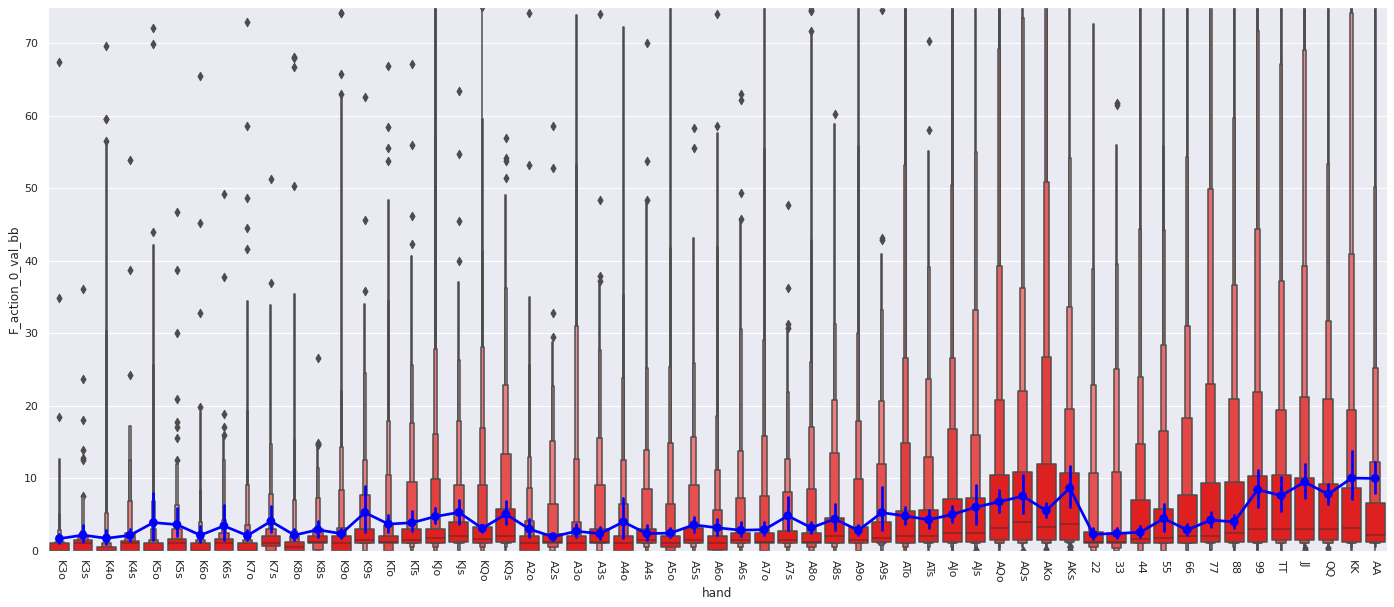

In [155]:
plt.figure(figsize=(24, 10))
plt.ylim((0,75))
plt.xticks(rotation=-90)
sns.boxenplot(data=short_handed, x="hand", y="PF_action_0_val_bb", order=str_hands[112:], color="red")
sns.pointplot(data=short_handed, x="hand", y="F_action_0_val_bb", order=str_hands[112:], color="blue")

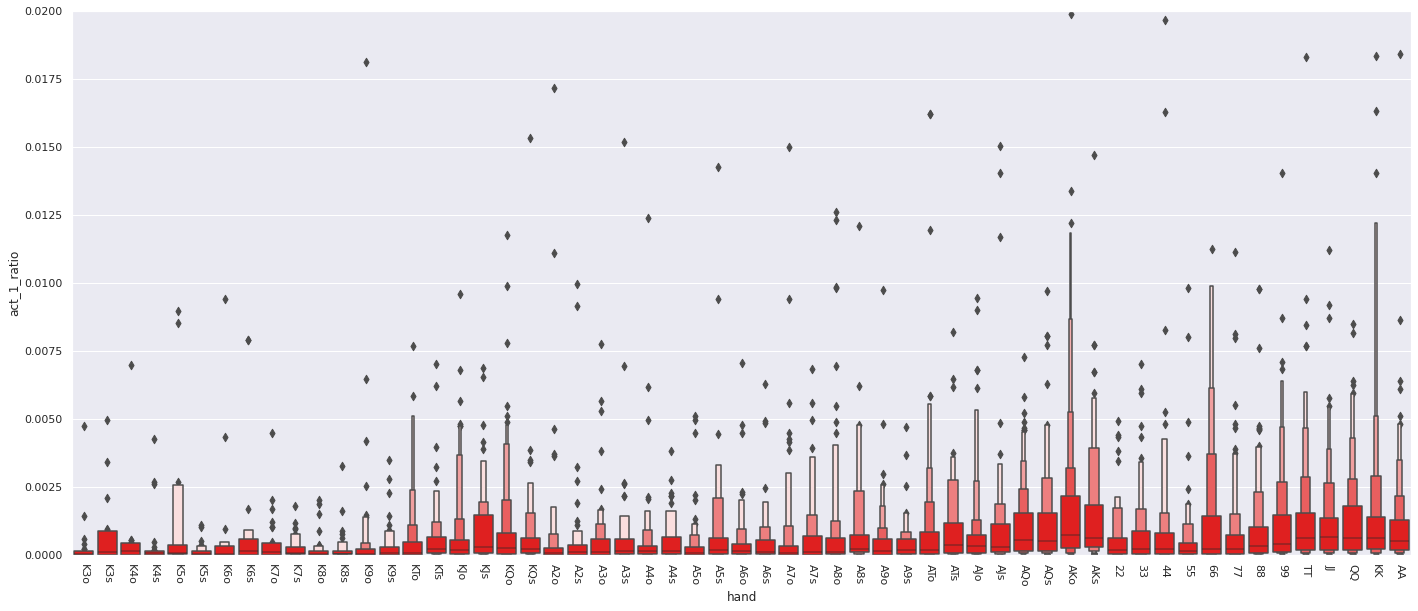

In [174]:
plt.figure(figsize=(24, 10))
plt.xticks(rotation=-90)
plt.ylim((0,2/100))
sns.boxenplot(data=short_handed, x="hand", y="act_1_ratio", order=str_hands[112:], color="red")

In [53]:
by_hand["PF_action_0_val_bb"].describe().T

hand,22,32o,32s,33,42o,42s,43o,43s,44,52o,52s,53o,53s,54o,54s,55,62o,62s,63o,63s,64o,64s,65o,65s,66,72o,72s,73o,73s,74o,74s,75o,75s,76o,76s,77,82o,82s,83o,83s,84o,84s,85o,85s,86o,86s,87o,87s,88,92o,92s,93o,93s,94o,94s,95o,95s,96o,96s,97o,97s,98o,98s,99,A2o,A2s,A3o,A3s,A4o,A4s,A5o,A5s,A6o,A6s,A7o,A7s,A8o,A8s,A9o,A9s,AA,AJo,AJs,AKo,AKs,AQo,AQs,ATo,ATs,J2o,J2s,J3o,J3s,J4o,J4s,J5o,J5s,J6o,J6s,J7o,J7s,J8o,J8s,J9o,J9s,JJ,JTo,JTs,K2o,K2s,K3o,K3s,K4o,K4s,K5o,K5s,K6o,K6s,K7o,K7s,K8o,K8s,K9o,K9s,KJo,KJs,KK,KQo,KQs,KTo,KTs,Q2o,Q2s,Q3o,Q3s,Q4o,Q4s,Q5o,Q5s,Q6o,Q6s,Q7o,Q7s,Q8o,Q8s,Q9o,Q9s,QJo,QJs,QQ,QTo,QTs,T2o,T2s,T3o,T3s,T4o,T4s,T5o,T5s,T6o,T6s,T7o,T7s,T8o,T8s,T9o,T9s,TT
count,474.000000,523.000000,201.000000,493.000000,434.000000,180.000000,467.000000,212.000000,513.000000,459.000000,175.000000,487.000000,196.000000,491.000000,214.000000,551.000000,484.000000,189.000000,471.000000,201.000000,456.000000,209.000000,545.000000,246.000000,616.000000,446.000000,184.000000,447.000000,189.000000,485.000000,220.000000,491.000000,215.000000,542.000000,277.000000,581.000000,483.000000,181.000000,471.000000,177.000000,453.000000,160.000000,499.000000,212.000000,505.000000,245.000000,578.000000,279.000000,624.000000,468.000000,163.000000,445.000000,165.000000,458.000000,185.000000,519.000000,193.000000,508.000000,210.000000,510.000000,242.000000,608.000000,285.000000,658.000000,636.000000,284.000000,739.000000,334.000000,733.000000,322.000000,797.000000,317.000000,815.000000,336.000000,822.000000,330.000000,902.000000,379.000000,947.000000,379.000000,714.000000,1162.000000,411.000000,1344.000000,473.000000,1183.000000,468.000000,1087.000000,368.000000,508.000000,210.000000,507.000000,180.000000,523.000000,175.000000,514.000000,225.000000,492.000000,231.000000,558.000000,218.000000,557.000000,249.000000,622.000000,306.000000,675.000000,787.000000,345.000000,497.000000,197.000000,512.000000,213.000000,525.000000,262.000000,549.000000,248.000000,512.000000,262.000000,576.000000,268.000000,628.000000,266.000000,661.000000,288.000000,1032.000000,376.000000,708.000000,1124.000000,416.000000,882.000000,345.000000,490.000000,222.000000,502.000000,205.000000,516.000000,216.000000,465.000000,232.000000,516.000000,241.000000,558.000000,254.000000,552.000000,269.000000,649.000000,301.000000,941.000000,346.000000,753.000000,861.000000,334.000000,490.000000,155.000000,459.000000,176.000000,515.000000,168.000000,449.000000,205.000000,503.000000,215.000000,576.000000,240.000000,540.000000,254.000000,664.000000,285.000000,666.000000
mean,7.112431,1.037357,0.741520,6.361354,0.210173,1.169035,0.360678,1.037267,7.927933,0.155484,1.179310,0.182961,0.722792,0.348507,1.239339,7.629014,0.778088,0.341958,0.110687,0.807193,0.514487,0.971156,1.031284,1.702190,8.953953,0.097618,0.898911,0.051174,0.798597,0.149725,0.754495,0.234690,1.623845,0.708015,1.647342,12.172746,0.082191,0.611278,0.054551,0.313844,0.286917,0.872713,0.243548,0.829968,0.807977,0.992472,0.934745,1.491649,9.988485,0.202636,0.581510,0.358530,0.302219,0.110191,0.904111,0.316345,0.634212,0.394869,1.120817,0.527856,1.832987,1.980512,2.692998,11.690853,2.925358,3.753502,3.813868,4.705149,3.816444,4.695564,4.289251,5.319999,3.696519,4.751591,5.168207,4.103125,4.789965,6.427361,5.904289,5.877658,7.921595,8.560465,9.157012,13.357375,10.113505,10.988568,11.862151,8.073264,7.867131,0.429437,0.594560,0.179541,1.174625,0.469222,0.482029,0.683186,0.895863,0.269468,2.121741,0.383258,1.478997,0.947726,6.526731,1.471617,3.549822,10.924498,3.520983,4.603801,1.344930,1.650594,0.872000,1.519940,1.506410,2.364690,1.572698,2.101434,0.887802,1.925233,1.396225,3.366893,1.786380,2.476345,3.103452,4.230974,5.396984,5.276660,11.119481,4.950651,6.205971,3.200756,5.082585,0.850994,2.431384,0.453852,2.126654,0.574383,1.565112,0.528432,0.981911,0.308745,1.896369,1.781134,1.734526,2.078464,2.077719,1.283117,2.396257,4.862121,4.103594,9.900881,2.441061,3.654464,0.265224,0.298890,0.121448,0.268252,0.175214,0.782754,0.321182,1.938105,0.522527

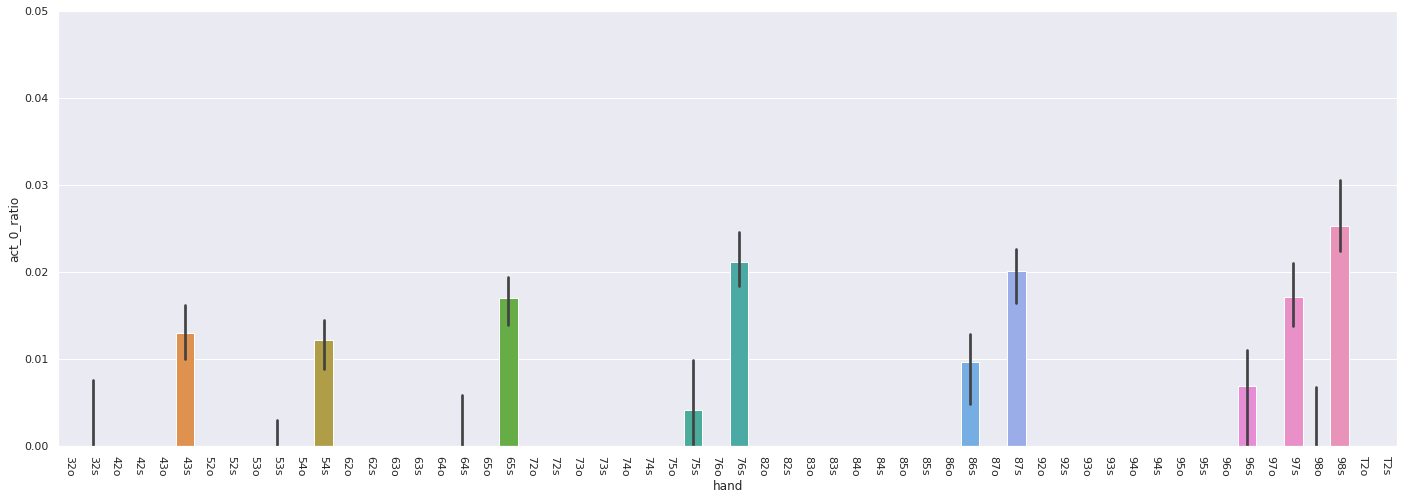

In [54]:
plt.figure(figsize=(24, 8))
plt.xticks(rotation=-90)
plt.ylim((0,0.05))
sns.barplot(data=short_handed, x="hand", y="act_0_ratio", order=str_hands[:58], estimator=np.median)

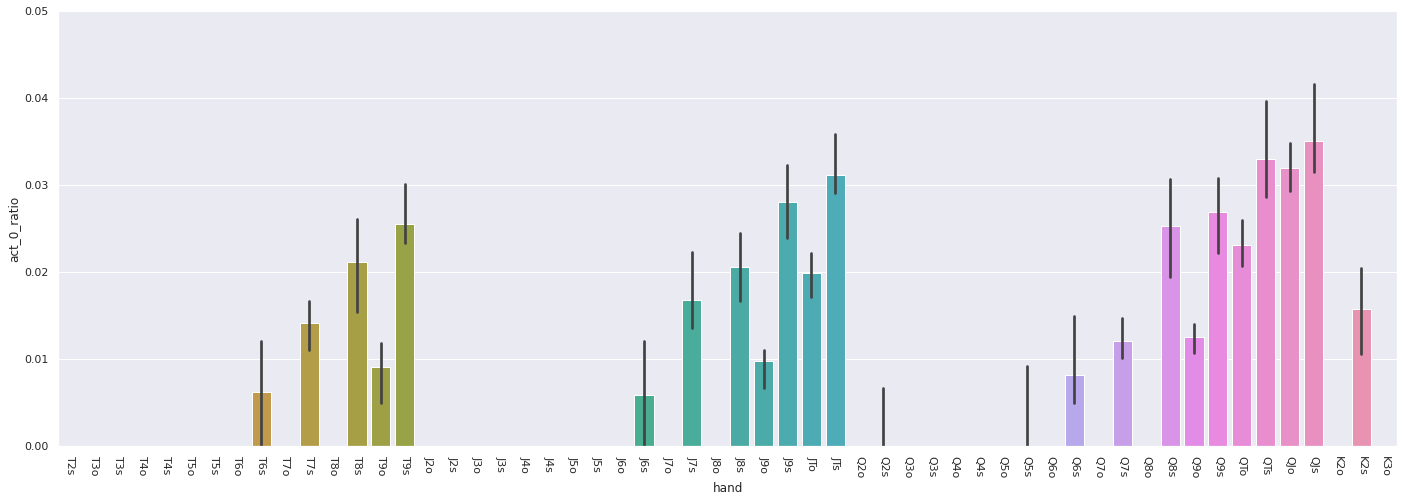

In [55]:
plt.figure(figsize=(24, 8))
plt.xticks(rotation=-90)
plt.ylim((0,0.05))
sns.barplot(data=short_handed, x="hand", y="act_0_ratio", order=str_hands[57:113], estimator=np.median)

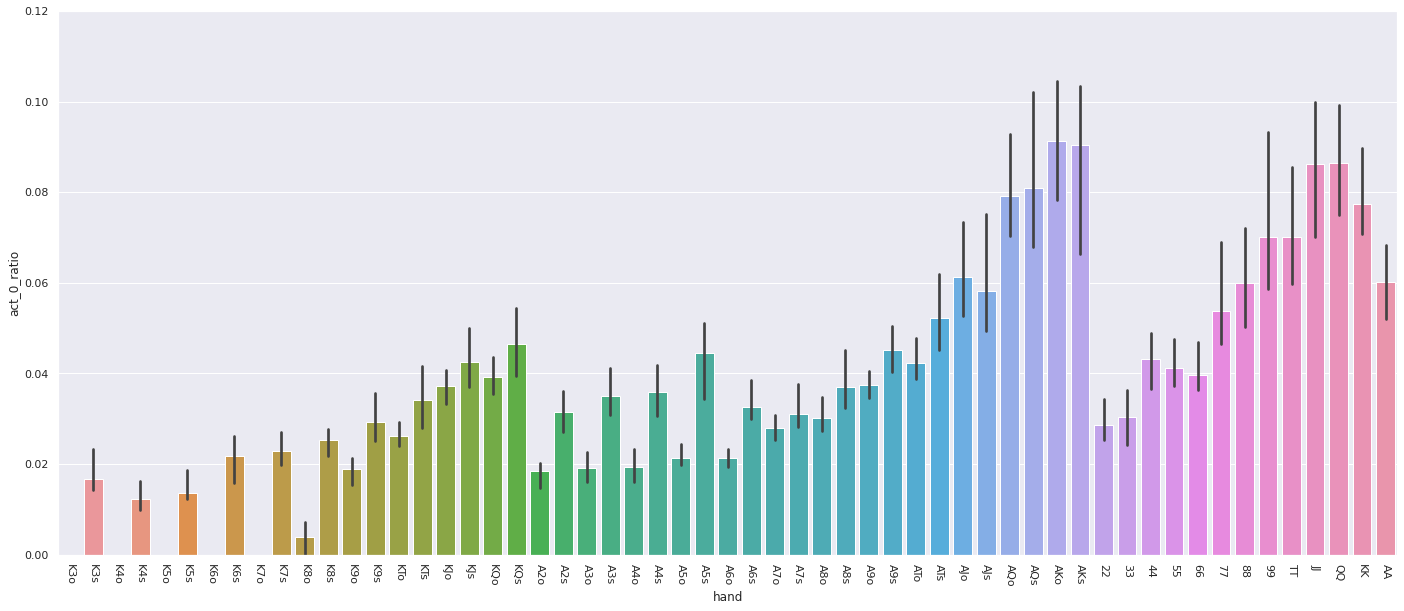

In [56]:
plt.figure(figsize=(24, 10))
plt.xticks(rotation=-90)
plt.ylim((0,0.12))
sns.barplot(data=short_handed, x="hand", y="act_0_ratio", order=str_hands[112:], estimator=np.median)

#Data analysis by hand groups
*Analyse des cibles par groupes de mains*

In [57]:
top_hands = np.union1d(premium_pairs, ["AKs", "AKo", "AQo", "AQs"])

In [58]:
short_handed["is_premium"] = short_handed["hand"].isin(premium_pairs)
short_handed["is_top_hand"] = short_handed["hand"].isin(top_hands)
short_handed["is_VGH"] = short_handed["hand"].isin(very_good_hands)
short_handed["is_SC"] = short_handed["hand"].isin(suited_connectors)
short_handed["SD_FD"] =  ((short_handed["has_straightdraw"] == "True")& (short_handed["has_flushdraw"] == "True"))
premium_df = short_handed[short_handed["is_premium"]]
top_hand_df = short_handed[short_handed["is_top_hand"]]
VGH_df = short_handed[short_handed["is_VGH"]]
SC_df = short_handed[short_handed["is_SC"]]

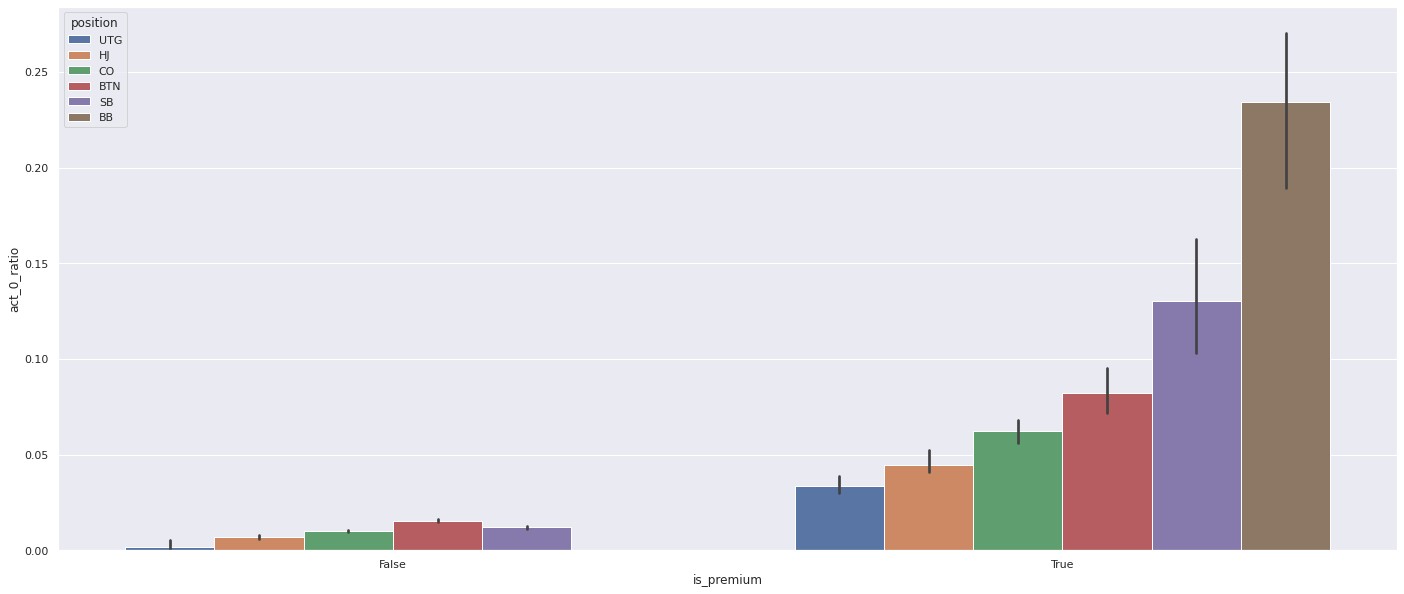

In [59]:
plt.figure(figsize=(24, 10))
#plt.xticks(rotation=-90)
#plt.ylim((0,0.12))
sns.barplot(data=short_handed, x="is_premium", y="act_0_ratio", hue="position", estimator=np.median)

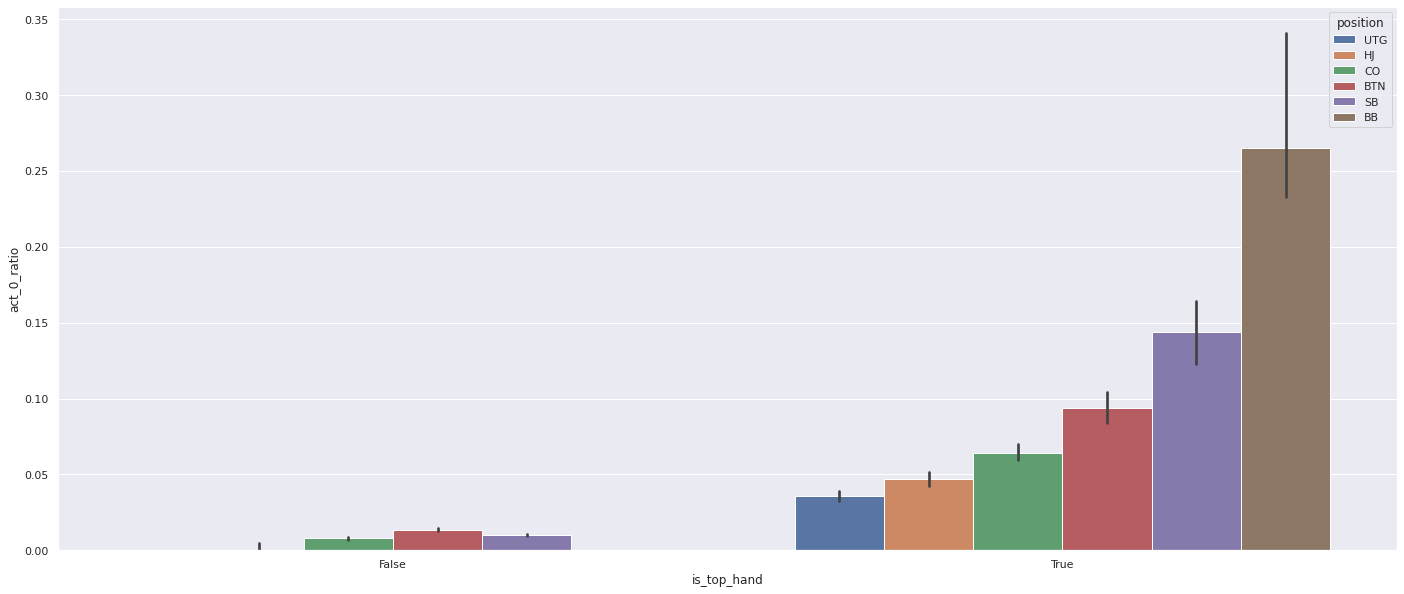

In [60]:
plt.figure(figsize=(24, 10))
#plt.xticks(rotation=-90)
#plt.ylim((0,0.12))
sns.barplot(data=short_handed, x="is_top_hand", y="act_0_ratio", hue="position", estimator=np.median)

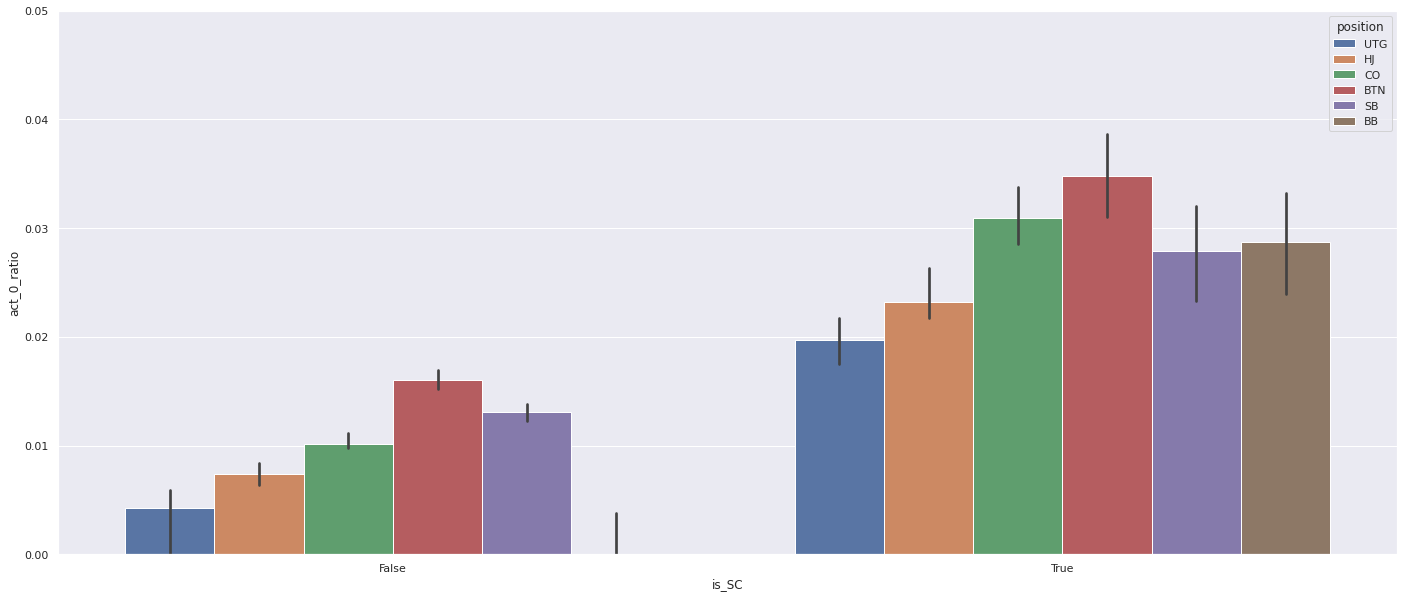

In [61]:
plt.figure(figsize=(24, 10))
#plt.xticks(rotation=-90)
plt.ylim((0,0.05))
sns.barplot(data=short_handed, x="is_SC", y="act_0_ratio", hue="position", estimator=np.median)

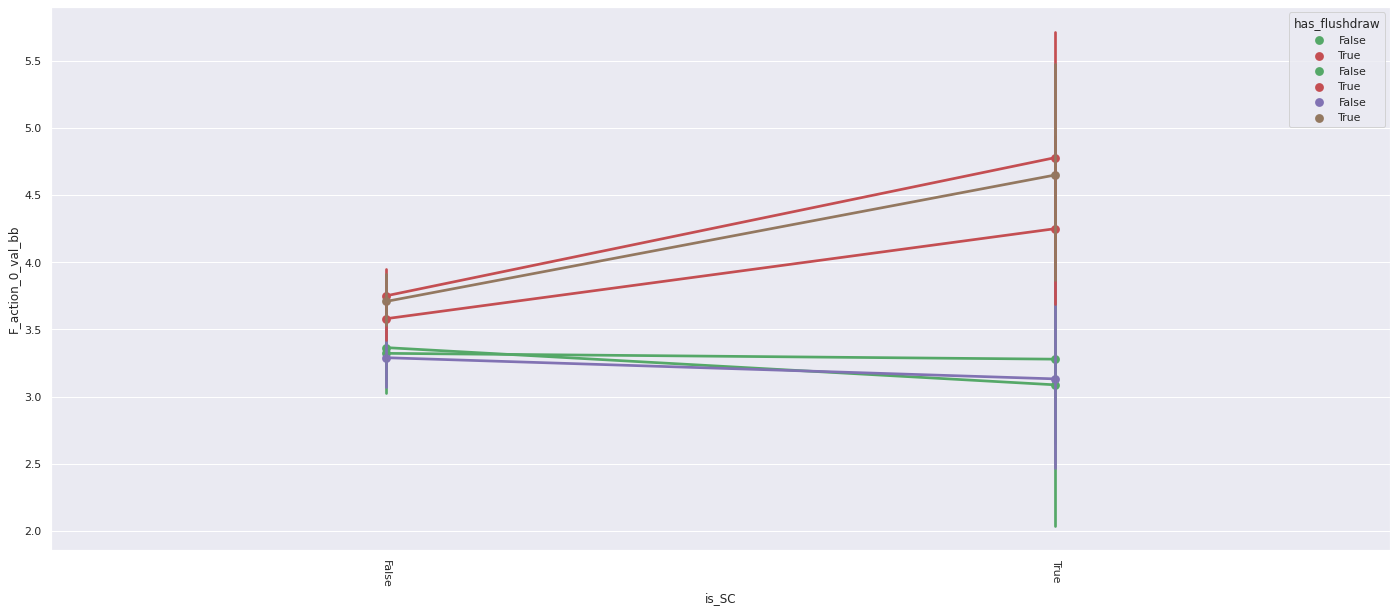

In [62]:
plt.figure(figsize=(24, 10))
#plt.ylim((0,25))
plt.xticks(rotation=-90)
#sns.barplot(data=short_handed, x="is_SC", y="PF_action_0_val_bb", color="red", hue="position", estimator=np.median)
sns.pointplot(data=short_handed, x="is_SC", y="F_action_0_val_bb",  hue="SD_FD", palette=["C2", "C3"])
sns.pointplot(data=short_handed, x="is_SC", y="F_action_0_val_bb",  hue="has_straightdraw", hue_order=["False", "True"], palette=["C2", "C3"])
sns.pointplot(data=short_handed, x="is_SC", y="F_action_0_val_bb",  hue="has_flushdraw", hue_order=["False", "True"],palette=["C4", "C5"] )  

This graph shows that Flop sizing enables us to detect Suited connectors, depending on whether the flop us connected or not. We might pursue further analyse by adding information about the main color of thr flop (if it is not rainbow) and observing if it matches with hand suit

In [63]:
short_handed.shape, short_handed[short_handed["is_VGH"]].shape

((76588, 69), (10014, 69))

In [64]:
premium_df.shape

(3551, 69)

In [65]:
copy0 = short_handed.copy()

In [66]:
copy0["ratio"] = np.round(copy0["act_0_ratio"], 2)

In [67]:
tab0 = short_handed.groupby("is_premium")["act_0_ratio"].value_counts(normalize=True).rename('ratios').mul(100).reset_index().sort_values('act_0_ratio')

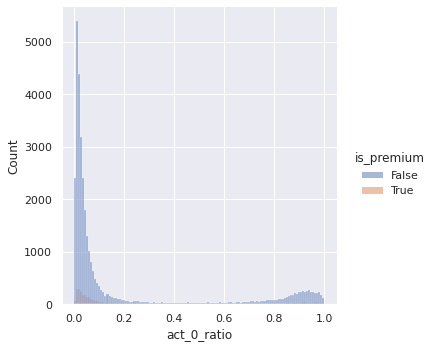

In [68]:
sns.displot(data=tab0, x="act_0_ratio", hue="is_premium", )

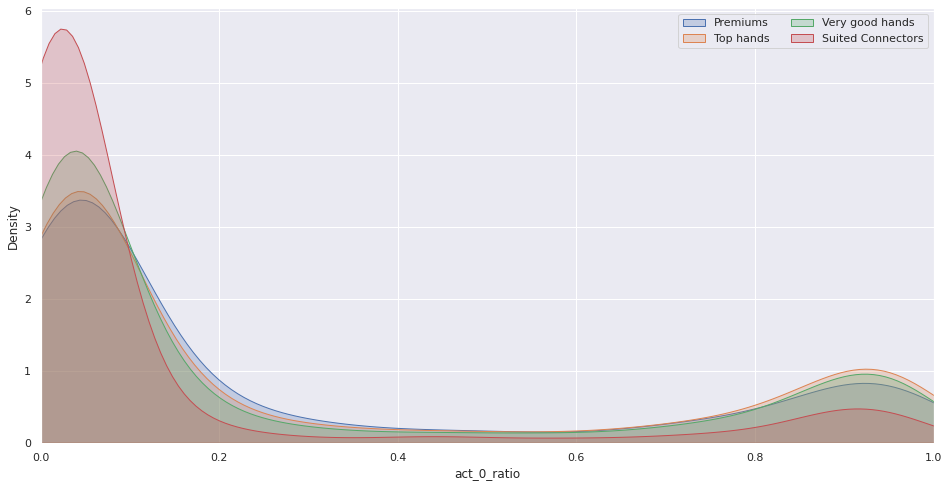

In [94]:
f, ax = plt.subplots(figsize=(16, 8))
plt.grid(True)
sns.kdeplot(x=premium_df["act_0_ratio"], fill=True, cbar=False, label="Premiums")
sns.kdeplot(x=top_hand_df["act_0_ratio"], fill=True, cbar=False, label="Top hands")
sns.kdeplot(x=VGH_df["act_0_ratio"], fill=True, cbar=False, label="Very good hands")
sns.kdeplot(x=SC_df["act_0_ratio"], fill=True, cbar=False, label="Suited Connectors")
#sns.kdeplot(x=trash_df["act_0_ratio"], fill=True, cbar=False, label="Trash")
ax.set(xlim=(-0, 1))
ax.legend(ncol=2, loc="upper right", frameon=True)

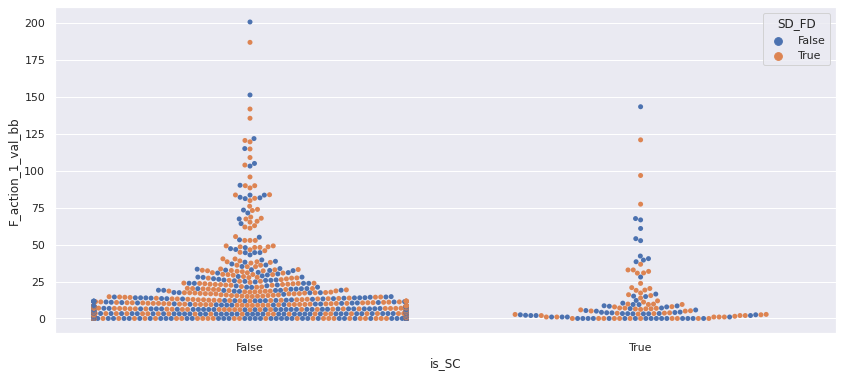

In [108]:
#short_handed
ax = sns.swarmplot(x="is_SC", y="F_action_1_val_bb", data=short_handed.iloc[:20000], hue="SD_FD")

# Analyse by level

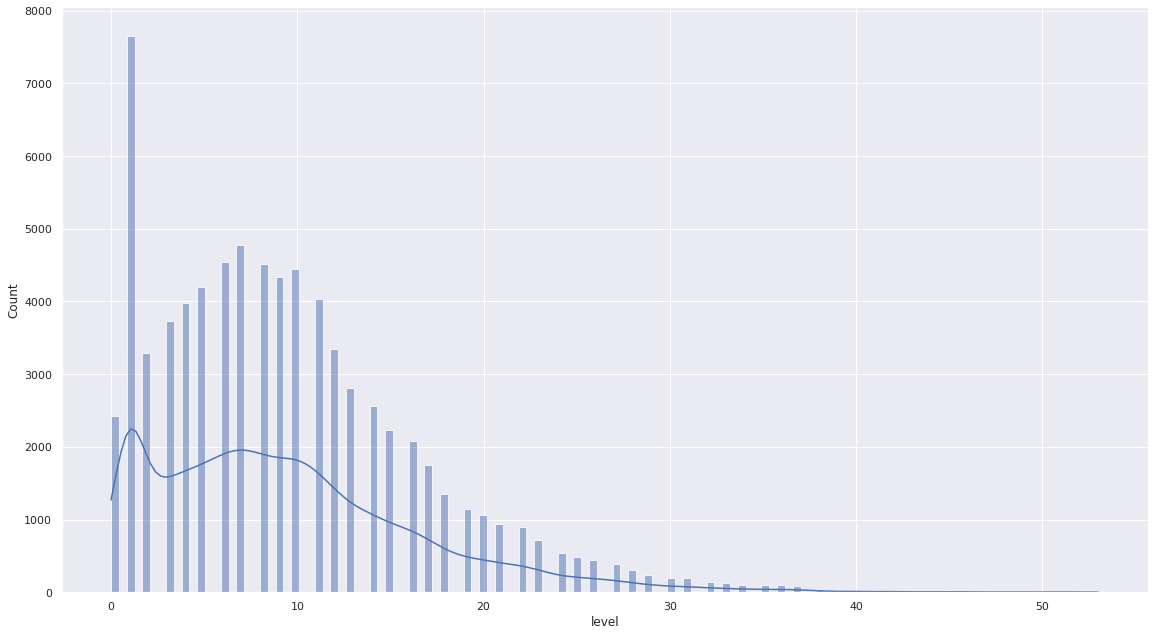

In [72]:
sns.displot(x="level", data=short_handed, kde=True, height=9, aspect=1.8)

(0.5, 55.5)

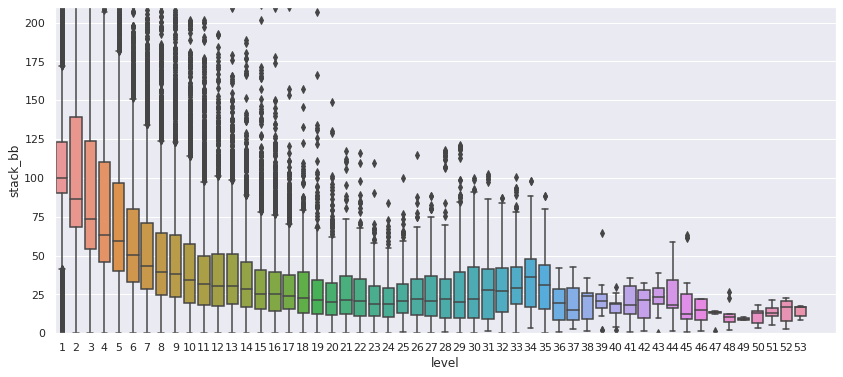

<Figure size 2520x720 with 0 Axes>

In [73]:
fig, ax = plt.subplots()
ax.set_ylim(0, 210)
sns.boxplot(x="level", y="stack_bb", data=short_handed, ax=ax)
plt.figure(figsize=(35, 10))
ax.set_xlim(0.5,55.5)


(0.5, 55.5)

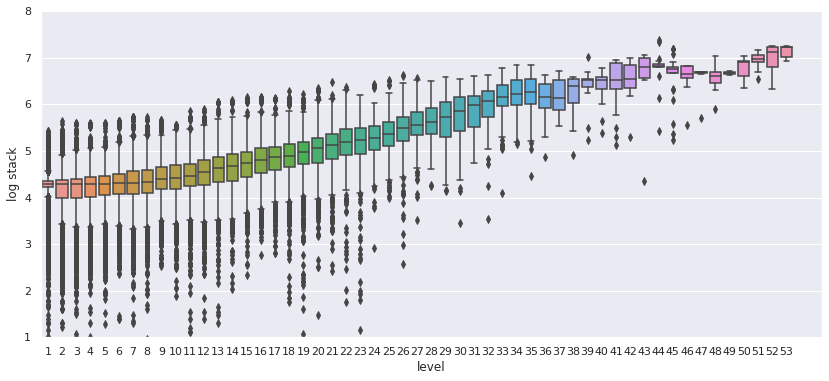

<Figure size 2520x720 with 0 Axes>

In [74]:
short_handed["log stack"] = np.log10(short_handed["stack"])
fig, ax = plt.subplots()
ax.set_ylim(1, 8)
plt.figure(figsize=(35, 10))
sns.boxplot(x="level", y="log stack", data=short_handed, ax=ax)
ax.set_xlim(0.5,55.5)


(0.0, 0.6)

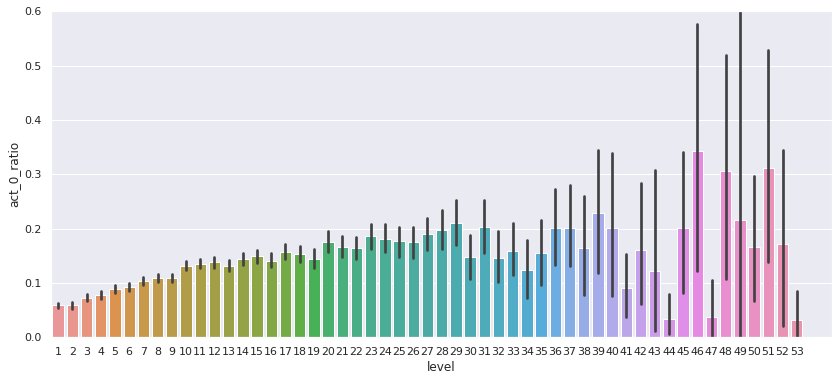

<Figure size 2520x720 with 0 Axes>

In [75]:
fig, ax = plt.subplots()
plt.figure(figsize=(35, 10))
sns.barplot(x="level", y="act_0_ratio", data=short_handed, ax=ax)
ax.set_xlim(0.5,55.5)
ax.set_ylim(0,0.6)

(0.5, 55.5)

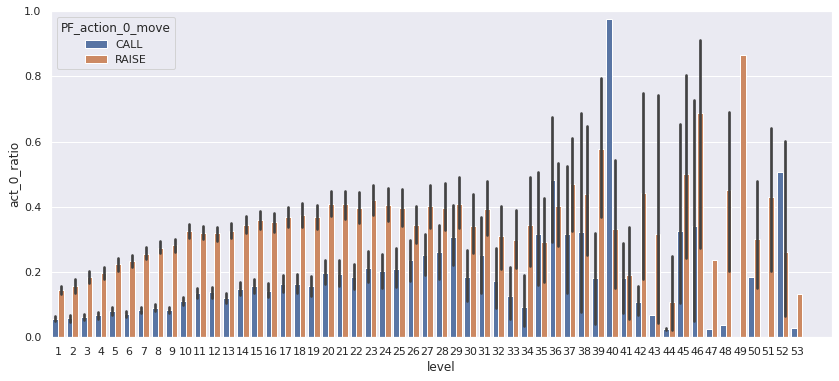

<Figure size 2520x720 with 0 Axes>

In [76]:
fig, ax = plt.subplots()
plt.figure(figsize=(35, 10))
sns.barplot(x="level", y="act_0_ratio", data=short_handed, hue="PF_action_0_move", ax=ax, hue_order=["CALL", "RAISE"])
ax.set_ylim(0,1)
ax.set_xlim(0.5,55.5)

In [78]:
to_stack = []
for lvl in range(50):
  to_stack.append(pd.Series(short_handed.groupby("level").get_group(lvl)["PF_action_0_move"].value_counts()).rename(lvl))
levels_tab = pd.concat(to_stack, axis=1).T.rename_axis("level")
levels_tab["SUM"] = levels_tab.sum(axis=1)
del(to_stack)
for col in levels_tab.columns:
  levels_tab[col] = levels_tab[col] /levels_tab["SUM"]
levels_tab = levels_tab.drop(["SUM"], axis=1)

(0.5, 55.5)

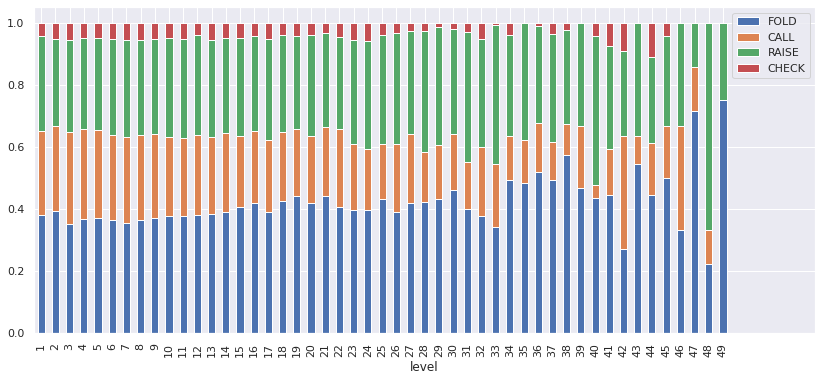

<Figure size 2520x720 with 0 Axes>

In [79]:
fig, ax = plt.subplots()
plt.figure(figsize=(35, 10))
levels_tab.plot(kind="bar", stacked=True, ax=ax)
ax.set_xlim(0.5,55.5)

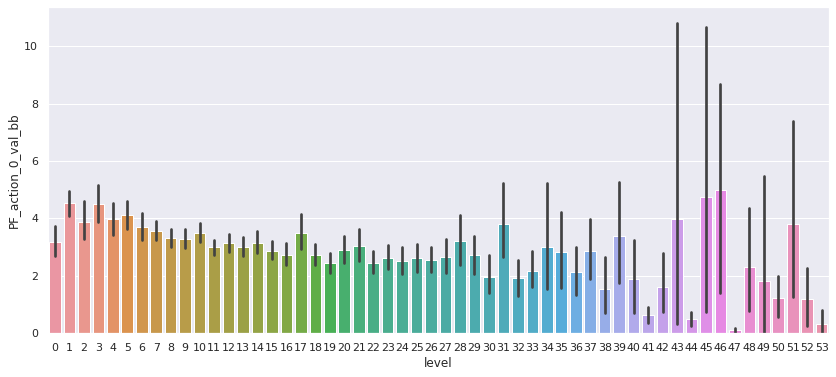

<Figure size 2304x720 with 0 Axes>

In [80]:
fig, ax = plt.subplots()
plt.figure(figsize=(32, 10))
sns.barplot(x="level", y="PF_action_0_val_bb", data=short_handed, ax=ax)

##Corresponding DataFrames
**DataFrames correspondants**

In [81]:
AA_df = short_handed[short_handed["hand"]=="AA"].reset_index(drop=True)
QQ_df = short_handed[short_handed["hand"]=="QQ"].reset_index(drop=True)
high_A_df = short_handed[short_handed["hand"].isin(high_A)].reset_index(drop=True)
broadways_df = short_handed[short_handed["hand"].isin(broadways)].reset_index(drop=True)
pairs_df = short_handed[short_handed["hand"].isin(pairs)].reset_index(drop=True)
suited_A_df = short_handed[short_handed["hand"].isin(suited_A)].reset_index(drop=True)
suited_df = short_handed[short_handed["hand"].isin(suited)].reset_index(drop=True)
offsuit_df = short_handed[short_handed["hand"].isin(offsuits)].reset_index(drop=True)
pp_df = short_handed[short_handed["hand"].isin(premium_pairs)].reset_index(drop=True)
sc_df = short_handed[short_handed["hand"].isin(suited_connectors)].reset_index(drop=True)
trash_df = short_handed[short_handed["hand"].isin(trash_hands)].reset_index(drop=True)

In [82]:
dataframes = [AA_df, QQ_df,high_A_df, broadways_df, pairs_df, suited_A_df, suited_df, offsuit_df, pp_df, sc_df, trash_df]

##Visualizations
**Visualisations**

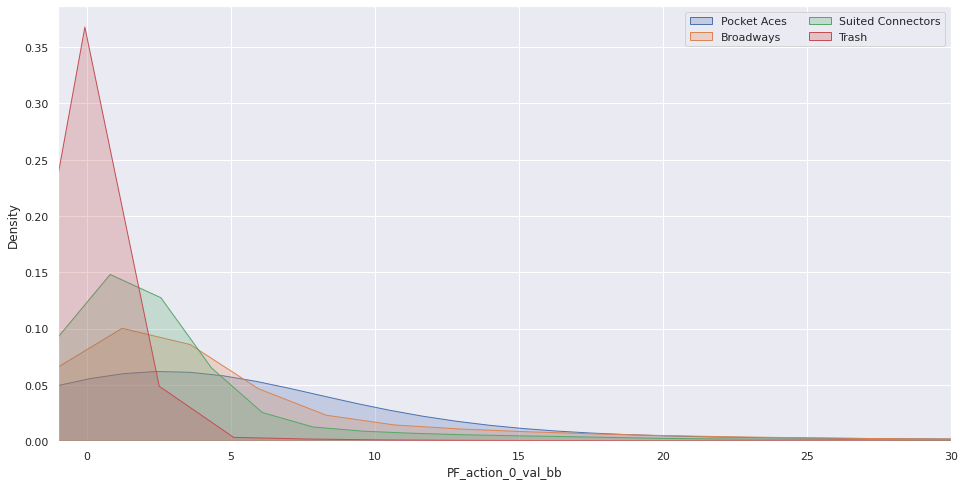

In [83]:
f, ax = plt.subplots(figsize=(16, 8))
plt.grid(True)
sns.kdeplot(x=AA_df["PF_action_0_val_bb"], fill=True, cbar=False, label="Pocket Aces")
sns.kdeplot(x=broadways_df["PF_action_0_val_bb"], fill=True, cbar=False, label="Broadways")
sns.kdeplot(x=sc_df["PF_action_0_val_bb"], fill=True, cbar=False, label="Suited Connectors")
sns.kdeplot(x=trash_df["PF_action_0_val_bb"], fill=True, cbar=False, label="Trash")
ax.set(xlim=(-1, 30))
ax.legend(ncol=2, loc="upper right", frameon=True)

In [131]:
move_x_hand = pd.crosstab(short_handed["PF_action_0_move"], short_handed['hand'])
tab_0 = pd.DataFrame(data=move_x_hand.to_dict(), columns=str_hands, index=actions).drop("BET")
freq_move_x_hand = tab_0/tab_0.sum(axis=0)*100
freq_move_x_hand2 = tab_0.T/tab_0.sum(axis=1)
move_x_pos = pd.crosstab(short_handed["PF_action_0_move"], short_handed['position'])
tab_1 = pd.DataFrame(data=move_x_pos.to_dict(), columns=positions, index=actions).drop("BET")
freq_move_x_pos = tab_1/tab_1.sum(axis=0)*100
freq_move_x_pos2 = tab_1.T/tab_1.sum(axis=1)*100
pos_x_hand = pd.crosstab(short_handed["position"], short_handed['hand'])
tab_2 = pd.DataFrame(data=pos_x_hand.to_dict(), columns=str_hands, index=positions)
freq_pos_x_hand = tab_2/tab_2.sum(axis=0)*100
freq_pos_x_hand2 = tab_2.T/tab_2.sum(axis=1)*100

,32o,32s,42o,42s,43o,43s,52o,52s,53o,53s,54o,54s,62o,62s,63o,63s,64o,64s,65o,65s,72o,72s,73o,73s,74o,74s,75o,75s,76o,76s,82o,82s,83o,83s,84o,84s,85o,85s,86o,86s,87o,87s,92o,92s,93o,93s,94o,94s,95o,95s,96o,96s,97o,97s,98o,98s,T2o,T2s,T3o,T3s,T4o,T4s,T5o,T5s,T6o,T6s,T7o,T7s,T8o,T8s,T9o,T9s,J2o,J2s,J3o,J3s,J4o,J4s,J5o,J5s,J6o,J6s,J7o,J7s,J8o,J8s,J9o,J9s,JTo,JTs,Q2o,Q2s,Q3o,Q3s,Q4o,Q4s,Q5o,Q5s,Q6o,Q6s,Q7o,Q7s,Q8o,Q8s,Q9o,Q9s,QTo,QTs,QJo,QJs,K2o,K2s,K3o,K3s,K4o,K4s,K5o,K5s,K6o,K6s,K7o,K7s,K8o,K8s,K9o,K9s,KTo,KTs,KJo,KJs,KQo,KQs,A2o,A2s,A3o,A3s,A4o,A4s,A5o,A5s,A6o,A6s,A7o,A7s,A8o,A8s,A9o,A9s,ATo,ATs,AJo,AJs,AQo,AQs,AKo,AKs,22,33,44,55,66,77,88,99,TT,JJ,QQ,KK,AA
FOLD,81.835564,43.781095,81.105991,60.555556,79.657388,29.245283,83.006536,61.142857,82.956879,51.020408,74.338086,30.841121,88.429752,66.666667,83.227176,56.716418,82.236842,49.760766,69.357798,21.544715,85.650224,76.086957,88.814318,69.312169,82.886598,60.000000,77.393075,41.860465,63.837638,11.913357,85.300207,77.348066,87.261146,77.401130,86.534216,59.375,82.965932,56.603774,75.445545,35.510204,57.266436,8.243728,85.256410,68.711656,84.943820,73.333333,84.497817,64.864865,83.815029,62.176166,81.889764,37.619048,71.568627,24.380165,46.710526,5.614035,88.367347,72.903226,85.838780,71.590909,84.854369,63.690476,81.291759,55.609756,79.125249,40.000000,75.173611,29.583333,60.925926,15.354331,37.951807,5.614035,82.086614,59.523810,81.459566,60.555556,81.261950,54.857143,78.599222,56.444444,76.626016,42.424242,72.580645,20.642202,56.193896,18.473896,36.173633,5.228758,19.822109,4.347826,76.938776,45.945946,74.900398,55.121951,72.868217,55.092593,75.913978,44.827586,79.844961,37.759336,69.713262,28.346457,55.072464,15.613383,30.816641,9.966777,14.518002,2.395210,3.719447,2.312139,64.185111,26.903553,58.203125,23.943662,62.095238,28.625954,59.016393,21.370968,61.132812,20.229008,54.340278,16.044776,42.993631,8.270677,19.364599,4.513889,9.523810,2.608696,2.906977,0.797872,1.957295,1.201923,25.471698,4.929577,23.680650,4.191617,19.645293,2.795031,17.063990,3.785489,20.368098,2.380952,12.895377,3.636364,7.982262,1.846966,4.223865,1.055409,1.839926,0.815217,1.376936,0.486618,0.422654,0.213675,0.148810,0.422833,8.227848,9.330629,5.068226,4.537205,2.110390,1.204819,0.961538,0.911854,1.051051,0.296296,0.000000,0.706215,0.140056
CHECK,7.074570,6.467662,9.447005,8.333333,6.423983,5.660377,9.368192,10.857143,6.981520,5.102041,7.331976,5.140187,5.991736,7.936508,8.492569,5.970149,6.140351,5.263158,7.889908,4.471545,7.847534,6.521739,7.158837,8.465608,9.484536,6.363636,9.572301,6.046512,6.826568,3.249097,9.109731,9.392265,7.643312,8.474576,7.947020,8.125,7.014028,3.773585,7.524752,6.530612,7.958478,6.451613,7.905983,10.429448,8.089888,6.666667,8.733624,10.270270,7.514451,4.663212,5.314961,7.619048,6.274510,2.892562,5.098684,3.508772,6.938776,5.806452,7.843137,7.954545,7.961165,5.952381,7.795100,6.829268,7.355865,6.046512,6.770833,5.000000,5.740741,5.118110,5.873494,3.157895,7.874016,1.904762,6.903353,7.777778,7.456979,9.142857,6.614786,7.111111,6.910569,5.194805,6.810036,7.798165,7.899461,3.212851,5.305466,3.921569,5.082592,2.608696,7.959184,5.405405,7.370518,4.390244,8.720930,5.092593,6.666667,6.034483,6.201550,4.979253,7.168459,7.480315,5.253623,1.858736,5.855162,2.990033,3.135889,2.694611,2.975558,1.734104,6.639839,7.614213,9.375000,6.103286,10.095238,6.870229,6.375228,5.241935,7.421875,5.725191,8.506944,4.104478,5.414013,4.511278,6.051437,3.472222,4.988662,2.028986,2.131783,2.925532,2.491103,1.201923,3.301887,2.816901,5.006766,2.395210,7.230559,3.105590,4.642409,2.208202,4.539877,2.083333,3.041363,1.515152,3.215078,3.166227,2.428722,2.374670,2.115915,1.630435,0.946644,0.729927,0.845309,0.427350,0.223214,0.211416,2.531646,2.839757,2.144250,1.996370,1.948052,1.893287,1.762821,0.607903,0.750751,0.148148,0.398406,0.282486,0.840336
CALL,7.265774,37.313433,5.069124,18.888889,9.421842,44.339623,4.575163,19.428571,7.392197,33.673469,12.423625,42.523364,3.512397,15.343915,5.944798,28.358209,6.5789

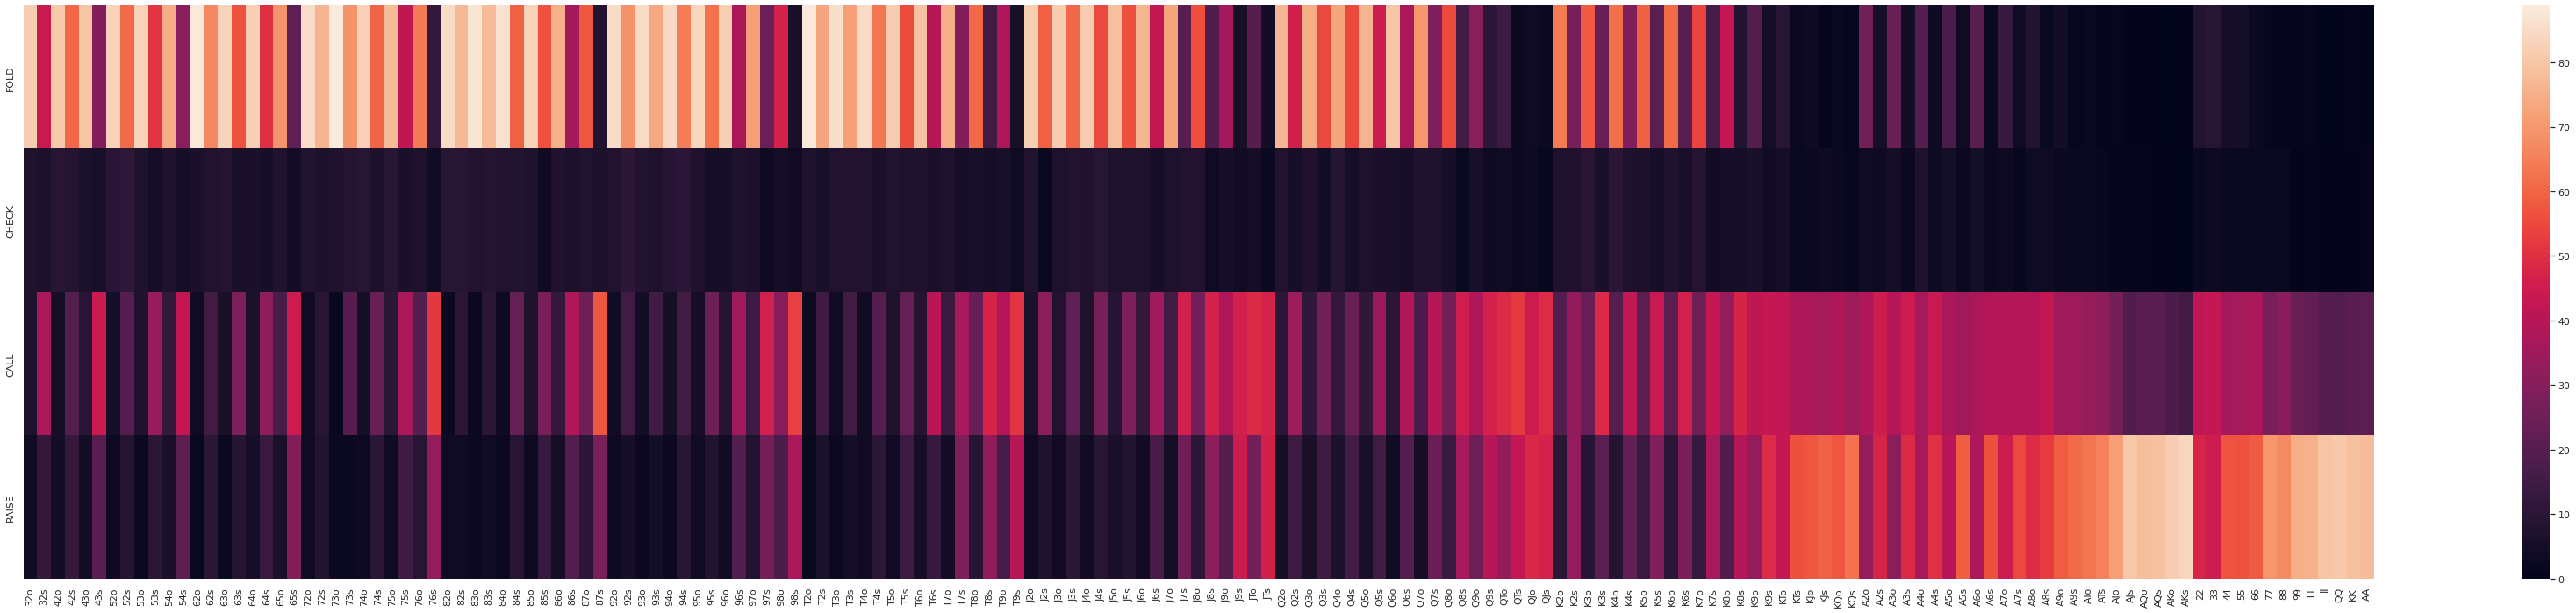

In [132]:
plt.figure(figsize=(60,12))
sns.heatmap(freq_move_x_hand)
freq_move_x_hand

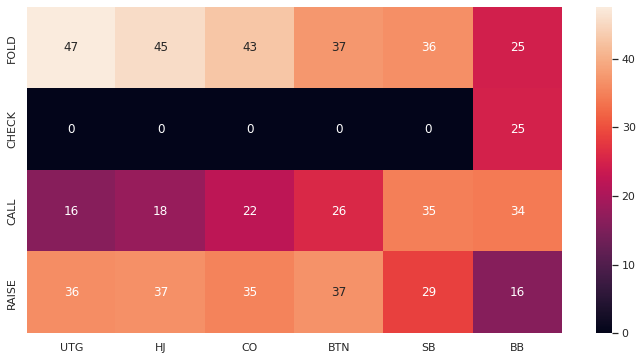

In [133]:
plt.figure(figsize=(12,6))
sns.heatmap(freq_move_x_pos, annot=True)

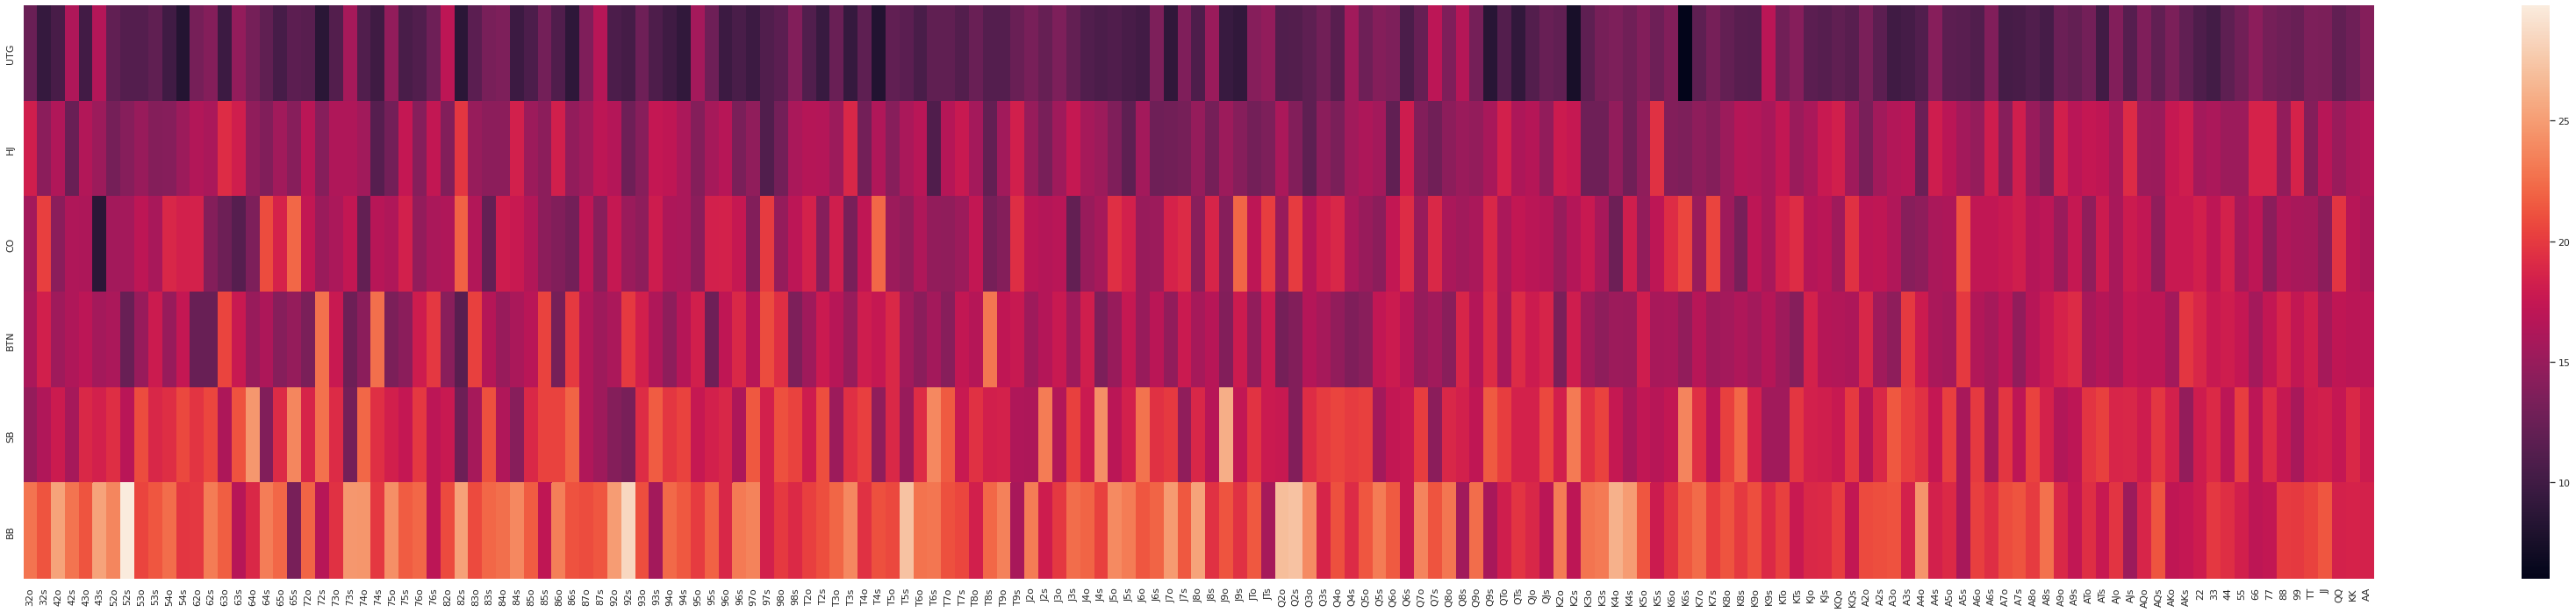

In [134]:
plt.figure(figsize=(60,12))
sns.heatmap(freq_pos_x_hand)

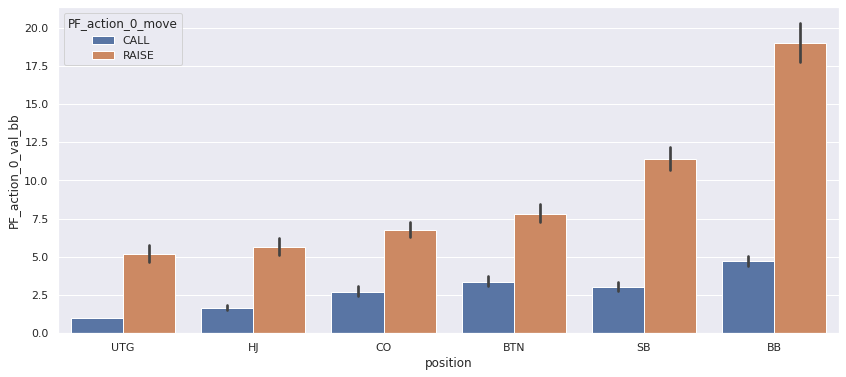

In [142]:
#sns.violinplot(x="Position", y="First_action_val", data=short_handed, order=positions)
sns.barplot(x="position", y="PF_action_0_val_bb", data=short_handed, order=positions, hue="PF_action_0_move", hue_order = pf_bet_actions)

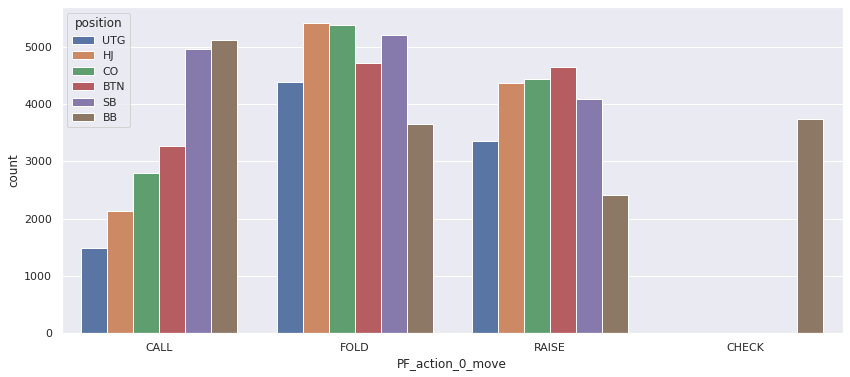

In [138]:
sns.countplot(data=short_handed, x="PF_action_0_move", hue="position", hue_order=positions)

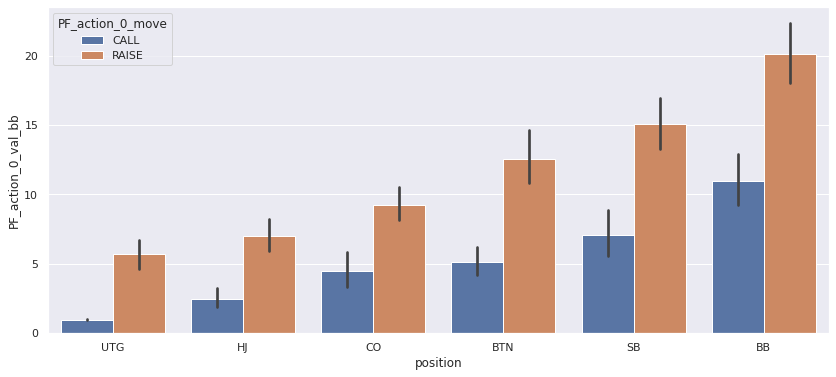

In [145]:
#sns.violinplot(x="Position", y="First_action_val", data=pairs_df)
sns.barplot(x="position", y="PF_action_0_val_bb", data=pairs_df, order=positions, hue="PF_action_0_move", hue_order = pf_bet_actions)

In [ ]:
sns.barplot(x="Hand", y="First_action_val", data=pairs_df, order=pairs)

In [ ]:
sns.countplot(data=pairs_df, x="PF_action_0_move", hue="Position", hue_order=positions)

In [ ]:
#sns.violinplot(x="Position", y="First_action_val", data=pp_df)
sns.barplot(x="Position", y="First_action_val", data=pp_df, order=positions, hue="First_action_move", hue_order = bet_actions)

In [ ]:
#sns.violinplot(x="Position", y="First_action_val", data=pp_df)
sns.barplot(x="Hand", y="First_action_val", data=pp_df, order=premium_pairs, hue="Position", hue_order = positions)

In [ ]:
sns.countplot(data=pp_df, x="PF_action_0_move", hue="Position", hue_order=positions)

In [ ]:
#sns.violinplot(x="Position", y="First_action_val", data=pp_df)
sns.barplot(x="Position", y="First_action_val", data=aces_df, order=positions, hue="First_action_move", hue_order = bet_actions)

In [ ]:
#sns.violinplot(x="Position", y="First_action_val", data=pp_df)
sns.barplot(x="Hand", y="First_action_val", data=aces_df, order=aces)

In [ ]:
sns.countplot(data=aces_df, x="PF_action_0_move", hue="Position", hue_order=positions)

In [ ]:
#sns.violinplot(x="Position", y="First_action_val", data=pp_df)
sns.barplot(x="Position", y="First_action_val", data=suited_aces_df, order=positions, hue="First_action_move", hue_order = bet_actions)

In [137]:
sns.countplot(data=suited_aces_df, x="PF_action_0_move", hue="position", hue_order=positions)

NameError: ignored

In [ ]:
sns.countplot(data=suited_aces_df, x="PF_action_0_move", hue="Hand", hue_order=suited_aces)

In [ ]:
#sns.violinplot(x="Position", y="First_action_val", data=pp_df)
sns.barplot(x="Position", y="First_action_val", data=sc_df, order=positions, hue="First_action_move", hue_order = bet_actions)

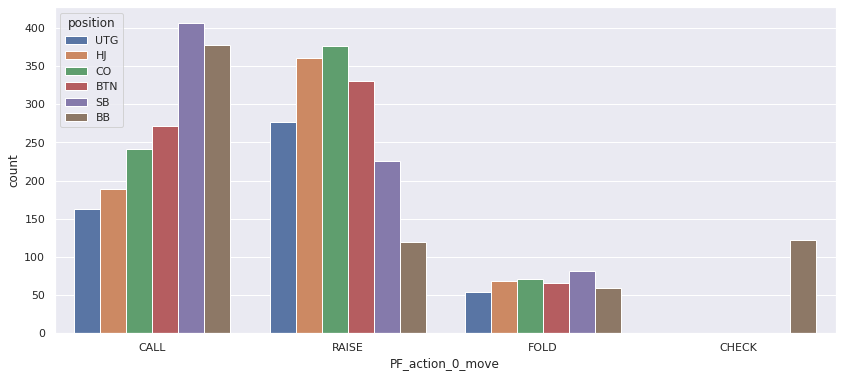

In [136]:
sns.countplot(data=sc_df, x="PF_action_0_move", hue="position", hue_order=positions)